In [1]:
#!/usr/bin/env python
# coding: utf-8

# Reading the data

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# 更改了df的名字

In [3]:
#修改了df 变量名
US_Accidents_Dec20_CA = pd.read_csv("US_Accidents_Dec20_CA.csv")
US_Accidents_Dec20_CA.head(10)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-729,MapQuest,201,3,2016/6/21 10:34,2016/6/21 11:04,38.085300,-122.233017,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-730,MapQuest,201,3,2016/6/21 10:30,2016/6/21 11:16,37.631813,-122.084167,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-731,MapQuest,201,2,2016/6/21 10:49,2016/6/21 11:19,37.896564,-122.070717,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-732,MapQuest,201,3,2016/6/21 10:41,2016/6/21 11:11,37.334255,-122.032471,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-733,MapQuest,201,2,2016/6/21 10:16,2016/6/21 11:04,37.250729,-121.910713,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-734,MapQuest,201,3,2016/6/21 10:31,2016/6/21 11:16,37.701584,-121.906929,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-735,MapQuest,201,3,2016/6/21 10:17,2016/6/21 11:03,37.328312,-121.871811,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-736,MapQuest,201,3,2016/6/21 10:51,2016/6/21 11:21,37.719162,-122.448273,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-737,MapQuest,201,2,2016/6/21 10:56,2016/6/21 11:26,37.868114,-122.195930,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-738,MapQuest,201,3,2016/6/21 10:57,2016/6/21 11:27,37.700951,-121.801750,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
US_Accidents_Dec20_CA.shape

(260386, 49)

In [5]:
US_Accidents_Dec20_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260386 entries, 0 to 260385
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     260386 non-null  object 
 1   Source                 260386 non-null  object 
 2   TMC                    260386 non-null  int64  
 3   Severity               260386 non-null  int64  
 4   Start_Time             260386 non-null  object 
 5   End_Time               260386 non-null  object 
 6   Start_Lat              260386 non-null  float64
 7   Start_Lng              260386 non-null  float64
 8   End_Lat                0 non-null       float64
 9   End_Lng                0 non-null       float64
 10  Distance(mi)           260386 non-null  float64
 11  Description            260385 non-null  object 
 12  Number                 61915 non-null   float64
 13  Street                 260386 non-null  object 
 14  Side                   260386 non-nu

In [6]:
US_Accidents_Dec20_CA.iloc[0,:]

ID                                                                   A-729
Source                                                            MapQuest
TMC                                                                    201
Severity                                                                 3
Start_Time                                                 2016/6/21 10:34
End_Time                                                   2016/6/21 11:04
Start_Lat                                                          38.0853
Start_Lng                                                         -122.233
End_Lat                                                                NaN
End_Lng                                                                NaN
Distance(mi)                                                             0
Description              Right hand shoulder blocked due to accident on...
Number                                                                 NaN
Street                   

In [7]:
## check一下是否都是California的，原表格太大，直接读取内核会挂，我在excel筛选的CA
US_Accidents_Dec20_CA["State"].unique()

array(['CA'], dtype=object)

## Creating features 
1. time duration of accidents
2. Month, day and weekday of accident

In [8]:
US_Accidents_Dec20_CA.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
## extrac year, month day, hour, weekday, and time to clear accidenct
US_Accidents_Dec20_CA["Start_Time"] = pd.to_datetime(US_Accidents_Dec20_CA["Start_Time"],errors="coerce")
US_Accidents_Dec20_CA["End_Time"] = pd.to_datetime(US_Accidents_Dec20_CA["End_Time"],errors="coerce")

## extract year, month day, hour 
US_Accidents_Dec20_CA["Year"] = US_Accidents_Dec20_CA["Start_Time"].dt.year
US_Accidents_Dec20_CA['Month']=US_Accidents_Dec20_CA['Start_Time'].dt.strftime('%b')
US_Accidents_Dec20_CA['Day']=US_Accidents_Dec20_CA['Start_Time'].dt.day
US_Accidents_Dec20_CA['Hour']=US_Accidents_Dec20_CA['Start_Time'].dt.hour
US_Accidents_Dec20_CA['Weekday']=US_Accidents_Dec20_CA['Start_Time'].dt.strftime('%a')

td = "Time_Duration(min)"
US_Accidents_Dec20_CA[td] = round((US_Accidents_Dec20_CA["End_Time"]-US_Accidents_Dec20_CA["Start_Time"])/np.timedelta64(1,"m"))

In [10]:
US_Accidents_Dec20_CA.shape

(260386, 55)

In [11]:
US_Accidents_Dec20_CA.head(10)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,A-729,MapQuest,201,3,2016-06-21 10:34:00,2016-06-21 11:04:00,38.085300,-122.233017,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,30.0
1,A-730,MapQuest,201,3,2016-06-21 10:30:00,2016-06-21 11:16:00,37.631813,-122.084167,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,46.0
2,A-731,MapQuest,201,2,2016-06-21 10:49:00,2016-06-21 11:19:00,37.896564,-122.070717,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,30.0
3,A-732,MapQuest,201,3,2016-06-21 10:41:00,2016-06-21 11:11:00,37.334255,-122.032471,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,30.0
4,A-733,MapQuest,201,2,2016-06-21 10:16:00,2016-06-21 11:04:00,37.250729,-121.910713,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,48.0
5,A-734,MapQuest,201,3,2016-06-21 10:31:00,2016-06-21 11:16:00,37.701584,-121.906929,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,45.0
6,A-735,MapQuest,201,3,2016-06-21 10:17:00,2016-06-21 11:03:00,37.328312,-121.871811,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,46.0
7,A-736,MapQuest,201,3,2016-06-21 10:51:00,2016-06-21 11:21:00,37.719162,-122.448273,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,30.0
8,A-737,MapQuest,201,2,2016-06-21 10:56:00,2016-06-21 11:26:00,37.868114,-122.195930,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,30.0
9,A-738,MapQuest,201,3,2016-06-21 10:57:00,2016-06-21 11:27:00,37.700951,-121.801750,NaN,NaN,...,Day,Day,Day,Day,2016,Jun,21,10,Tue,30.0


In [12]:
US_Accidents_Dec20_CA[td]

0         30.0
1         46.0
2         30.0
3         30.0
4         48.0
          ... 
260381    48.0
260382    28.0
260383    30.0
260384    47.0
260385    30.0
Name: Time_Duration(min), Length: 260386, dtype: float64

## Drop redundant variables 

In [13]:
US_Accidents_Dec20_CA = US_Accidents_Dec20_CA.drop(['Start_Time', 'End_Time'], axis=1)

## Drop Unnecessary varaibles

In [14]:
US_Accidents_Dec20_CA = US_Accidents_Dec20_CA.drop(['ID', 'Description', 'Street', 
                                                    'Zipcode', 'Country','Weather_Timestamp',
                                                    'TMC','Number','Street',
                                                    'Timezone','Civil_Twilight',
                                                    'Nautical_Twilight','Astronomical_Twilight'], axis=1)

In [15]:
# drop variables with only one level
US_Accidents_Dec20_CA = US_Accidents_Dec20_CA.drop(['State', 'Source', 'Turning_Loop'], axis=1)

In [16]:
US_Accidents_Dec20_CA.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Side', 'City', 'County', 'Airport_Code',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Year',
       'Month', 'Day', 'Hour', 'Weekday', 'Time_Duration(min)'],
      dtype='object')

In [17]:
US_Accidents_Dec20_CA.shape

(260386, 38)

# Examining Data Integrity and Data Cleaning

### Data Type

# 改成用info了

In [18]:
US_Accidents_Dec20_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260386 entries, 0 to 260385
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Severity            260386 non-null  int64  
 1   Start_Lat           260386 non-null  float64
 2   Start_Lng           260386 non-null  float64
 3   End_Lat             0 non-null       float64
 4   End_Lng             0 non-null       float64
 5   Distance(mi)        260386 non-null  float64
 6   Side                260386 non-null  object 
 7   City                260384 non-null  object 
 8   County              260386 non-null  object 
 9   Airport_Code        260324 non-null  object 
 10  Temperature(F)      254569 non-null  float64
 11  Wind_Chill(F)       88119 non-null   float64
 12  Humidity(%)         254046 non-null  float64
 13  Pressure(in)        255667 non-null  float64
 14  Visibility(mi)      254794 non-null  float64
 15  Wind_Direction      255614 non-nul

### Missing Values

In [19]:
## missing values count
s_nacount = np.sum(US_Accidents_Dec20_CA.isna())
s_nacount

Severity                   0
Start_Lat                  0
Start_Lng                  0
End_Lat               260386
End_Lng               260386
Distance(mi)               0
Side                       0
City                       2
County                     0
Airport_Code              62
Temperature(F)          5817
Wind_Chill(F)         172267
Humidity(%)             6340
Pressure(in)            4719
Visibility(mi)          5592
Wind_Direction          4772
Wind_Speed(mph)        43658
Precipitation(in)     172281
Weather_Condition       5173
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Sunrise_Sunset             2
Year                       0
Month                      0
Day           

In [20]:
US_Accidents_Dec20_CA.isnull().sum()/US_Accidents_Dec20_CA.shape[0]*100

Severity                0.000000
Start_Lat               0.000000
Start_Lng               0.000000
End_Lat               100.000000
End_Lng               100.000000
Distance(mi)            0.000000
Side                    0.000000
City                    0.000768
County                  0.000000
Airport_Code            0.023811
Temperature(F)          2.233991
Wind_Chill(F)          66.158319
Humidity(%)             2.434847
Pressure(in)            1.812309
Visibility(mi)          2.147581
Wind_Direction          1.832664
Wind_Speed(mph)        16.766646
Precipitation(in)      66.163695
Weather_Condition       1.986666
Amenity                 0.000000
Bump                    0.000000
Crossing                0.000000
Give_Way                0.000000
Junction                0.000000
No_Exit                 0.000000
Railway                 0.000000
Roundabout              0.000000
Station                 0.000000
Stop                    0.000000
Traffic_Calming         0.000000
Traffic_Si

In [21]:
## Dropping variables with >50% missing observations
US_Accidents_Dec20_CA = US_Accidents_Dec20_CA.drop(['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1)

In [22]:
US_Accidents_Dec20_CA.shape

(260386, 34)

In [23]:
## Dropping missing values
US_Accidents_Dec20_CA.dropna(axis=0,how="any",inplace=True)
print("Total missing values:",np.sum(US_Accidents_Dec20_CA.isna()).sum())
print(US_Accidents_Dec20_CA.shape)

Total missing values: 0
(213707, 34)


In [24]:
US_Accidents_Dec20_CA.isna().sum()

Severity              0
Start_Lat             0
Start_Lng             0
Distance(mi)          0
Side                  0
City                  0
County                0
Airport_Code          0
Temperature(F)        0
Humidity(%)           0
Pressure(in)          0
Visibility(mi)        0
Wind_Direction        0
Wind_Speed(mph)       0
Weather_Condition     0
Amenity               0
Bump                  0
Crossing              0
Give_Way              0
Junction              0
No_Exit               0
Railway               0
Roundabout            0
Station               0
Stop                  0
Traffic_Calming       0
Traffic_Signal        0
Sunrise_Sunset        0
Year                  0
Month                 0
Day                   0
Hour                  0
Weekday               0
Time_Duration(min)    0
dtype: int64

###  Duplicated Entries

In [25]:
## Check Duplicated entries
num_duplicated = np.sum(US_Accidents_Dec20_CA.duplicated())
print(num_duplicated)

432


In [26]:
## Drop Duplicate entries
US_Accidents_Dec20_CA.drop_duplicates(inplace=True)

In [27]:
# Check Duplicated entries again
num_duplicated = np.sum(US_Accidents_Dec20_CA.duplicated())
print(num_duplicated)

0


In [28]:
## check missing values have been dropped. 
US_Accidents_Dec20_CA.head(5)

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,County,Airport_Code,Temperature(F),Humidity(%),...,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,3,38.085300,-122.233017,0.0,R,Vallejo,Solano,KAPC,75.0,48.0,...,False,False,False,Day,2016,Jun,21,10,Tue,30.0
1,3,37.631813,-122.084167,0.0,R,Hayward,Alameda,KHWD,75.0,48.0,...,False,False,False,Day,2016,Jun,21,10,Tue,46.0
2,2,37.896564,-122.070717,0.0,R,Walnut Creek,Contra Costa,KCCR,82.9,31.0,...,False,False,False,Day,2016,Jun,21,10,Tue,30.0
3,3,37.334255,-122.032471,0.0,R,Cupertino,Santa Clara,KNUQ,75.9,48.0,...,False,False,False,Day,2016,Jun,21,10,Tue,30.0
4,2,37.250729,-121.910713,0.0,R,San Jose,Santa Clara,KRHV,75.2,41.0,...,False,False,False,Day,2016,Jun,21,10,Tue,48.0


## Outliers

In [29]:
## Finding outliers (outlier > mean + 3*std_dev)
stats = US_Accidents_Dec20_CA.describe().transpose()
stats['outlier_max'] = stats['mean'] + 3*stats['std']
stats['outlier_min'] = stats['mean'] - 3*stats['std']
stats.loc[stats['min'] < stats['outlier_min'], 'outlier'] = 1
stats.loc[stats['max'] > stats['outlier_max'], 'outlier'] = 1
stats

,count,mean,std,min,25%,50%,75%,max,outlier_max,outlier_min,outlier
Severity,213275.0,2.400206,0.494020,1.000000,2.000000,2.000000,3.000000,4.000000,3.882267,0.918146,1.0
Start_Lat,213275.0,35.623320,2.064440,32.542587,33.949665,34.216019,37.749832,41.992886,41.816641,29.429999,1.0
Start_Lng,213275.0,-119.600102,1.996001,-124.369232,-121.833443,-118.452553,-117.936512,-114.510925,-113.612098,-125.588106,NaN
Distance(mi),213275.0,0.045946,0.444381,0.000000,0.000000,0.000000,0.010000,51.130000,1.379091,-1.287198,1.0
Temperature(F),213275.0,65.986089,12.656290,7.000000,57.000000,64.900000,73.900000,127.000000,103.954960,28.017219,1.0
Humidity(%),213275.0,58.964764,23.149133,2.000000,42.000000,61.000000,77.000000,100.000000,128.412163,-10.482635,NaN
Pressure(in),213275.0,29.816991,0.498205,3.010000,29.820000,29.920000,30.020000,58.040000,31.311607,28.322375,1.0
Visibility(mi),213275.0,9.202990,2.329285,0.000000,10.000000,10.000000,10.000000,100.000000,16.190844,2.215136,1.0
Wind_Speed(mph),213275.0,7.097722,6.223569,0.000000,3.500000,6.900000,9.200000,822.800000,25.768430,-11.572986,1.0
Year,213275.0,2017.722527,1.747040,2016.000000,2016.000000,2017.000000,2020.000000,2020.000000,2022.963646,2012.481408,NaN


In [30]:
# Capping duration to mean + 3 * sd
# Not capping other weather related vars as these might be meaningful extreme weather days
mean = np.mean(US_Accidents_Dec20_CA[td])
std = np.std(US_Accidents_Dec20_CA[td])
n = 3
outliers = (US_Accidents_Dec20_CA[td]- mean).abs() > std * n 
US_Accidents_Dec20_CA[td][outliers] = np.nan
US_Accidents_Dec20_CA[td].fillna(mean + n * std,inplace=True)

<ipython-input-30-c9e8c6de3ae8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Accidents_Dec20_CA[td][outliers] = np.nan


In [31]:
# Capping Distance to mean + 3*sd
mean = np.mean(US_Accidents_Dec20_CA['Distance(mi)'])
std = np.std(US_Accidents_Dec20_CA['Distance(mi)'])
n = 3
outliers = (US_Accidents_Dec20_CA['Distance(mi)']- mean).abs() > std * n
US_Accidents_Dec20_CA['Distance(mi)'][outliers] = np.nan
US_Accidents_Dec20_CA['Distance(mi)'].fillna(mean + n * std,inplace=True)

<ipython-input-31-f59a213cd1a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Accidents_Dec20_CA['Distance(mi)'][outliers] = np.nan


In [32]:
## Side
print(US_Accidents_Dec20_CA["Side"].value_counts())
# drop the one obs with empty Side value
US_Accidents_Dec20_CA = US_Accidents_Dec20_CA[US_Accidents_Dec20_CA["Side"] != " "]

R    188004
L     25270
          1
Name: Side, dtype: int64


### simplify categorical variables with too many levels

In [33]:
# simplify wind direction 
US_Accidents_Dec20_CA['Wind_Direction'].unique()

array(['Variable', 'WSW', 'NNW', 'NNE', 'NE', 'WNW', 'NW', 'West',
       'South', 'SW', 'North', 'SSW', 'SE', 'SSE', 'ESE', 'ENE', 'East',
       'S', 'VAR', 'CALM', 'E', 'W', 'N'], dtype=object)

In [34]:
US_Accidents_Dec20_CA.loc[(US_Accidents_Dec20_CA['Wind_Direction']=='West')|(US_Accidents_Dec20_CA['Wind_Direction']=='WSW')|(US_Accidents_Dec20_CA['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
US_Accidents_Dec20_CA.loc[(US_Accidents_Dec20_CA['Wind_Direction']=='South')|(US_Accidents_Dec20_CA['Wind_Direction']=='SSW')|(US_Accidents_Dec20_CA['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
US_Accidents_Dec20_CA.loc[(US_Accidents_Dec20_CA['Wind_Direction']=='North')|(US_Accidents_Dec20_CA['Wind_Direction']=='NNW')|(US_Accidents_Dec20_CA['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
US_Accidents_Dec20_CA.loc[(US_Accidents_Dec20_CA['Wind_Direction']=='East')|(US_Accidents_Dec20_CA['Wind_Direction']=='ESE')|(US_Accidents_Dec20_CA['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", US_Accidents_Dec20_CA['Wind_Direction'].unique())

Wind Direction after simplification:  ['VAR' 'W' 'N' 'NE' 'NW' 'S' 'SW' 'SE' 'E' 'CALM']


In [35]:
# simplify weather condition
US_Accidents_Dec20_CA['Weather_Condition'].unique()

array(['Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy',
       'Scattered Clouds', 'Overcast', 'Light Rain', 'Smoke', 'Fog',
       'Patches of Fog', 'Rain', 'Mist', 'Light Drizzle', 'Heavy Rain',
       'Shallow Fog', 'Light Snow', 'Snow', 'Light Freezing Fog',
       'Light Haze', 'Light Thunderstorms and Rain', 'Light Rain Showers',
       'Thunderstorms and Rain', 'Fair', 'Cloudy', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Drizzle', 'Light Rain / Windy', 'Hail',
       'Heavy Drizzle', 'Showers in the Vicinity', 'Light Rain Shower',
       'Light Rain with Thunder', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Rain / Windy', 'Heavy Rain / Windy', 'Light Freezing Rain',
       'Thunderstorm', 'Squalls', 'N/A Precipitation', 'Heavy T-Storm',
       'Thunder', 'Cloudy / Windy', 'Partial Fog', 'Haze / Windy',
       'Heavy Snow', 'Light Snow / Windy', 'Smoke / Win

In [36]:
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan


In [37]:
print("Weather_Condition after simplification: ", US_Accidents_Dec20_CA["Weather_Condition"].unique())

Weather_Condition after simplification:  ['Clear' 'Cloudy' 'Fog' 'Rain' 'Smoke' 'Snow' 'Thunderstorm' 'Sand'
 'Windy' 'Hail' nan]


### final dataset preview

In [38]:
US_Accidents_Dec20_CA.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'County', 'Airport_Code', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Year', 'Month',
       'Day', 'Hour', 'Weekday', 'Time_Duration(min)'],
      dtype='object')

In [39]:
US_Accidents_Dec20_CA.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,County,Airport_Code,Temperature(F),Humidity(%),...,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,3,38.085300,-122.233017,0.0,R,Vallejo,Solano,KAPC,75.0,48.0,...,False,False,False,Day,2016,Jun,21,10,Tue,30.0
1,3,37.631813,-122.084167,0.0,R,Hayward,Alameda,KHWD,75.0,48.0,...,False,False,False,Day,2016,Jun,21,10,Tue,46.0
2,2,37.896564,-122.070717,0.0,R,Walnut Creek,Contra Costa,KCCR,82.9,31.0,...,False,False,False,Day,2016,Jun,21,10,Tue,30.0
3,3,37.334255,-122.032471,0.0,R,Cupertino,Santa Clara,KNUQ,75.9,48.0,...,False,False,False,Day,2016,Jun,21,10,Tue,30.0
4,2,37.250729,-121.910713,0.0,R,San Jose,Santa Clara,KRHV,75.2,41.0,...,False,False,False,Day,2016,Jun,21,10,Tue,48.0


# Exploring the data 

### Severity distribution


Very imbalanced data, need to resample for modeling

In [40]:
US_Accidents_Dec20_CA["Severity"].value_counts()
## 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) 
## 4 indicates a significant impact on traffic (i.e., long delay)

2    127919
3     84927
4       285
1       143
Name: Severity, dtype: int64

In [41]:
US_Accidents_Dec20_CA["Severity"].value_counts(normalize=True)

2    0.599787
3    0.398206
4    0.001336
1    0.000670
Name: Severity, dtype: float64

In [42]:
US_Accidents_Dec20_CA[['Severity', 'Time_Duration(min)']].groupby('Severity').min()

,Time_Duration(min)
Severity,
1,29.0
2,11.0
3,20.0
4,28.0


In [43]:
US_Accidents_Dec20_CA[['Severity', 'Time_Duration(min)']].groupby('Severity').max()

,Time_Duration(min)
Severity,
1,150.000000
2,179.366168
3,179.366168
4,179.366168


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


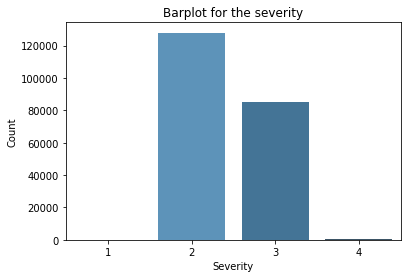

In [44]:
severity_counts = US_Accidents_Dec20_CA["Severity"].value_counts()
plt.title("Barplot for the severity")
sns.barplot(severity_counts.index, severity_counts.values, palette="Blues_d")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


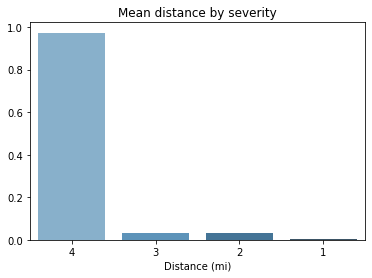

In [45]:
# Comparing with other severity levels, Severity 4 accidents have far more impact on traffic distance.
severity_distance = US_Accidents_Dec20_CA.groupby("Severity").mean()["Distance(mi)"].sort_values(ascending=False)
plt.title("Mean distance by severity")
sns.barplot( severity_distance.index, severity_distance.values, order=severity_distance.index, palette="Blues_d")
plt.xlabel("Distance (mi)")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


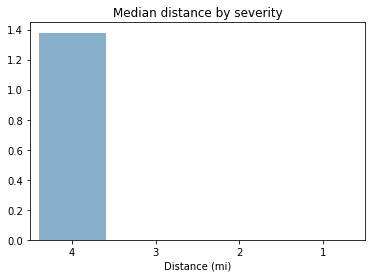

In [46]:
# Comparing with other severity levels, Severity 4 accidents have far more impact on traffic distance.
severity_distance = US_Accidents_Dec20_CA.groupby("Severity").median()["Distance(mi)"].sort_values(ascending=False)
plt.title("Median distance by severity")
sns.barplot( severity_distance.index, severity_distance.values, order=severity_distance.index, palette="Blues_d")
plt.xlabel("Distance (mi)")
plt.show()

In [47]:
severity_distance = US_Accidents_Dec20_CA.groupby("Severity").median()["Distance(mi)"]
severity_distance

Severity
1    0.000000
2    0.000000
3    0.000000
4    1.379088
Name: Distance(mi), dtype: float64

### Road Features

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


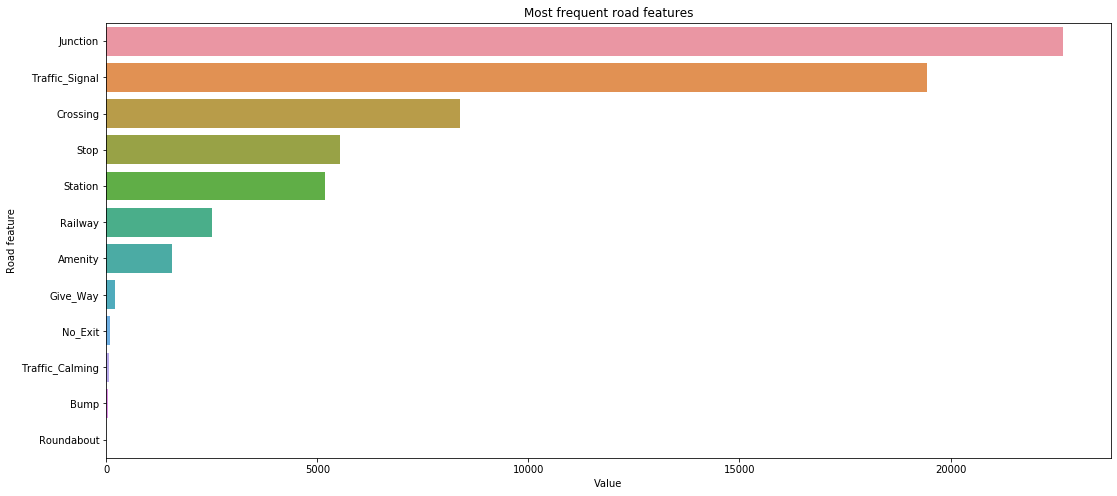

In [48]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal"]
data_road_features = US_Accidents_Dec20_CA[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data_road_features.values, data_road_features.index);
plt.xlabel("Value");
plt.ylabel("Road feature");
plt.show();

Most accidents happended near a traffic signal, expecially where a junction, a Stop sign, or a crossing was present.

### weather condition

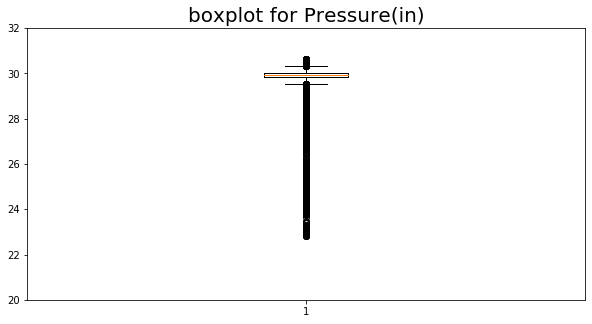

In [49]:
box_1 = US_Accidents_Dec20_CA['Pressure(in)']
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.ylim(20,32)
plt.title('boxplot for Pressure(in)',fontsize=20)#标题，并设定字号大小
plt.boxplot([box_1])#grid=False：代表不显示背景中的网格线
plt.show()

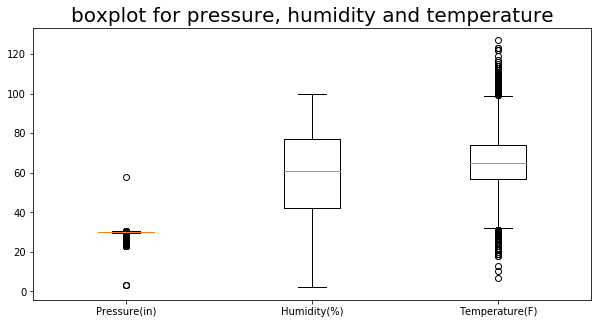

In [50]:
box_1, box_2, box_3= US_Accidents_Dec20_CA['Pressure(in)'], US_Accidents_Dec20_CA['Humidity(%)'], US_Accidents_Dec20_CA['Temperature(F)']
 
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('boxplot for pressure, humidity and temperature',fontsize=20)#标题，并设定字号大小
labels = 'Pressure(in)','Humidity(%)','Temperature(F)'#图例
plt.boxplot([box_1, box_2, box_3], labels = labels)#grid=False：代表不显示背景中的网格线
# data.boxplot()#画箱型图的另一种方法，参数较少，而且只接受dataframe，不常用
plt.show()

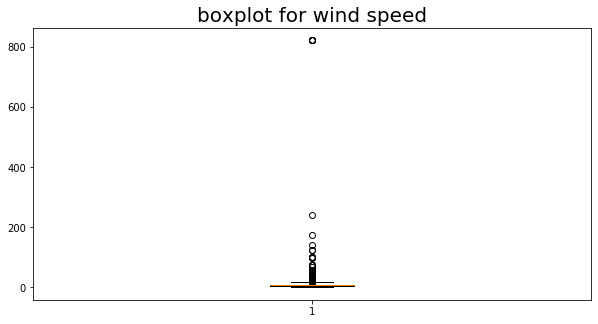

In [51]:
box_1 = US_Accidents_Dec20_CA['Wind_Speed(mph)']
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('boxplot for wind speed',fontsize=20)#标题，并设定字号大小
plt.boxplot([box_1])#grid=False：代表不显示背景中的网格线
plt.show()

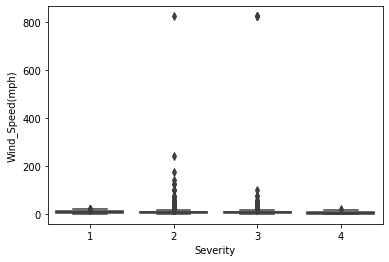

In [52]:
order = US_Accidents_Dec20_CA['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Wind_Speed(mph)', data = US_Accidents_Dec20_CA, order = order)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


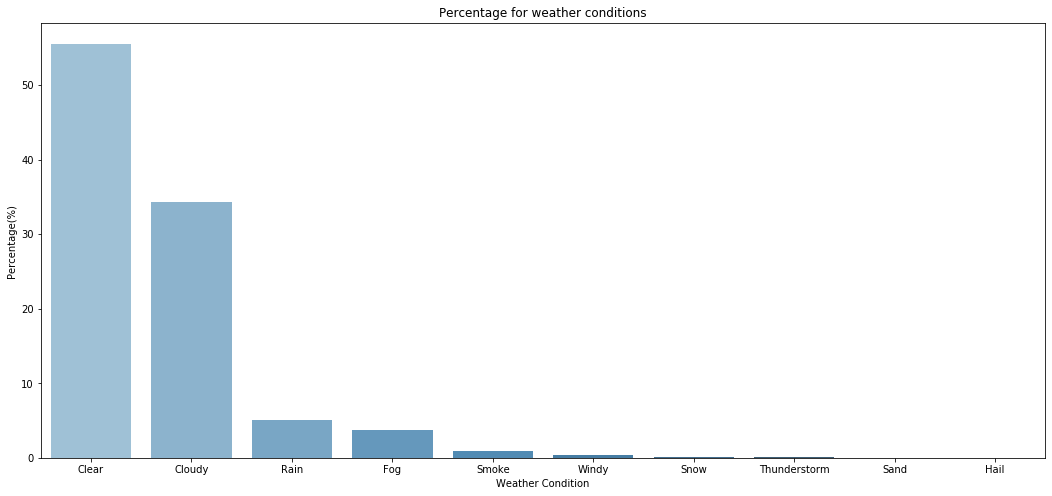

In [53]:
counts = US_Accidents_Dec20_CA["Weather_Condition"].value_counts()/len(US_Accidents_Dec20_CA["Weather_Condition"])*100
plt.figure(figsize=(18, 8))
plt.title("Percentage for weather conditions")
sns.barplot(counts.index, counts.values, palette="Blues_d")
plt.xlabel("Weather Condition")
plt.ylabel("Percentage(%)")
plt.show()

In most frequent cases the weather condition is clear.

### Time Features: weekday and time of day

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


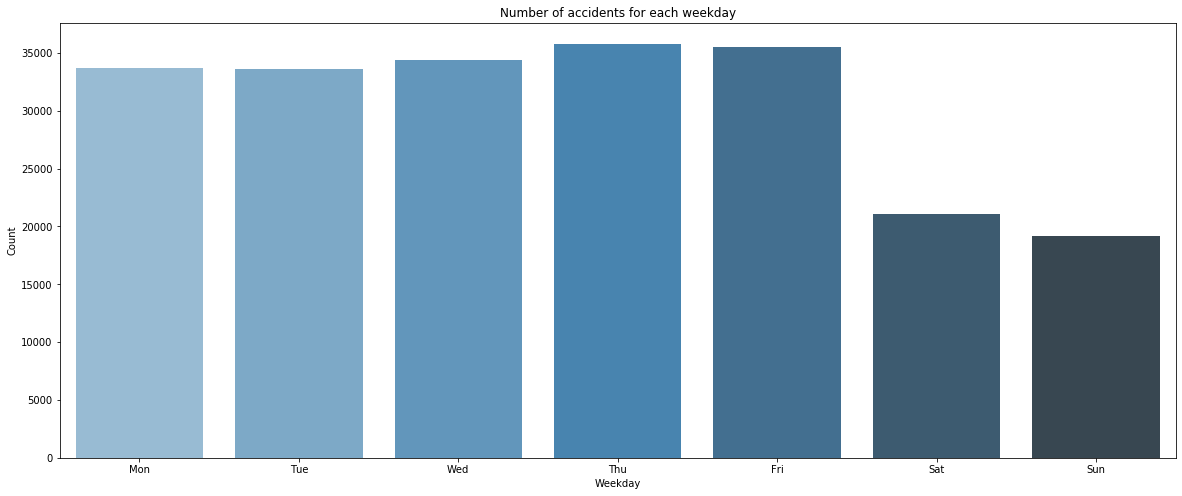

In [54]:
# Number of accidents for weekday
counts = US_Accidents_Dec20_CA['Weekday'].value_counts()
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(counts.index, counts.values, order=weekdays, palette="Blues_d")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

Accidents are more likely to happen during work days, while in the weekend we have a frequency of about 1/2 less. This may be due to the fact that there are fewer cars on the road during the weekend.

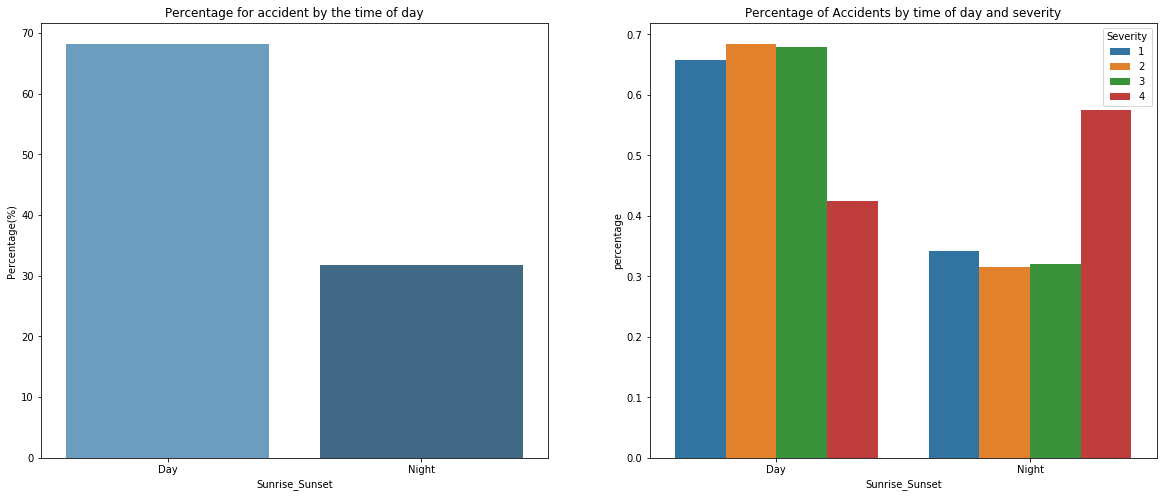

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
counts = US_Accidents_Dec20_CA["Sunrise_Sunset"].value_counts()/len(US_Accidents_Dec20_CA["Sunrise_Sunset"])*100
axes[0].set_title("Percentage for accident by the time of day")
sns.barplot(ax = axes[0], x = counts.index, y = counts.values, palette="Blues_d")
axes[0].set_xlabel("Sunrise_Sunset")
axes[0].set_ylabel("Percentage(%)")
data = US_Accidents_Dec20_CA['Sunrise_Sunset'].groupby(US_Accidents_Dec20_CA['Severity']).value_counts(normalize=True).rename('percentage').reset_index()
sns.barplot(ax = axes[1], x='Sunrise_Sunset', y = 'percentage',  hue='Severity', data = data)
axes[1].set_title('Percentage of Accidents by time of day and severity');

As is seen from the plot above, accidents were more likely to happen during day time, but those happened at night were more likely to be of severity level 4.

### Check correlation between features

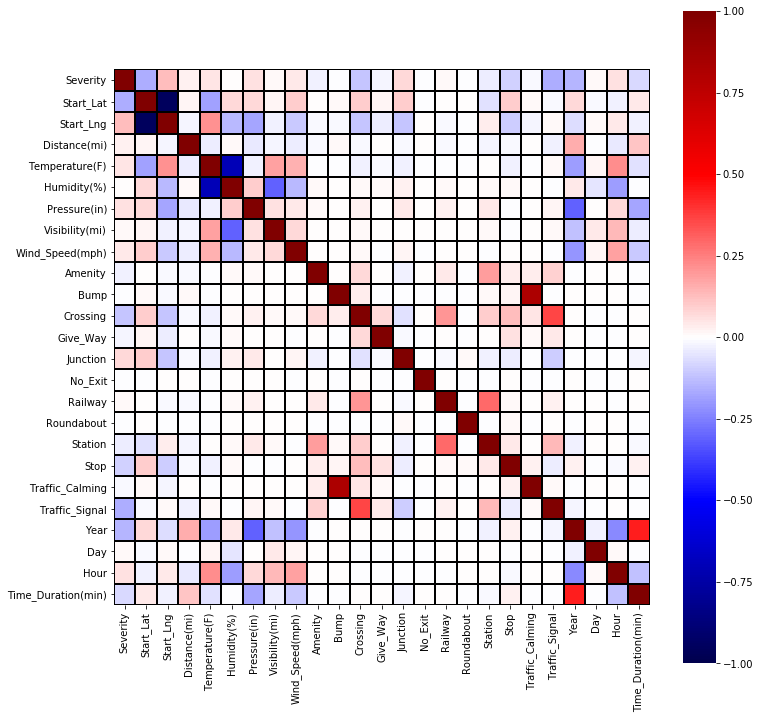

In [56]:
fig=plt.gcf()
fig.set_size_inches(12,12)
fig=sns.heatmap(US_Accidents_Dec20_CA.corr(), cmap="seismic",
                linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,
                cbar_kws={"orientation": "vertical"},cbar=True)

- the presence of a `traffic_signal`, `crossing` and `junction` are slightly correlated to the `severity`, which may indicate that traffic lights can help the traffic flow when an accident occurs.
- `bump` and `traffic_calming` are highly correlated, can delete one for future analysis

# EXPLORATION & ENGINEERING

## County (use time duration)

In [57]:
#remove outliers' function
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    return data.loc[(data[variable] > lower) & (data[variable] < upper), :]

In [58]:
US_Accidents_Dec20_CA['County'].value_counts()

Los Angeles        66629
Alameda            16003
San Diego          15339
Sacramento         13640
Orange             11993
Santa Clara        10907
Riverside          10824
San Bernardino     10570
Contra Costa        8460
San Mateo           5163
San Joaquin         4803
Solano              3920
Sonoma              3848
San Francisco       2975
Ventura             2820
Placer              2060
Monterey            2054
Marin               1887
Fresno              1855
Stanislaus          1742
Santa Cruz          1687
Kern                1616
Santa Barbara       1386
Yolo                1351
El Dorado           1257
Napa                1251
Merced               797
Tulare               779
Nevada               609
San Luis Obispo      573
Madera               415
Butte                410
Mendocino            402
San Benito           329
Lake                 309
Amador               304
Calaveras            295
Kings                252
Yuba                 244
Humboldt             205


In [59]:
def plot_categorical(County, data, with_filter=True):
    if not with_filter:
        County = data
    fig, axs = plt.subplots(nrows=2)
    
    sns.boxplot(
        x='County',
        y='Time_Duration(min)',
        data=County.sort_values('County'),
        ax=axs[0],
    )

    sns.countplot(
        x='County',
        data=County.sort_values('County'),
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=data['Time_Duration(min)'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.1)

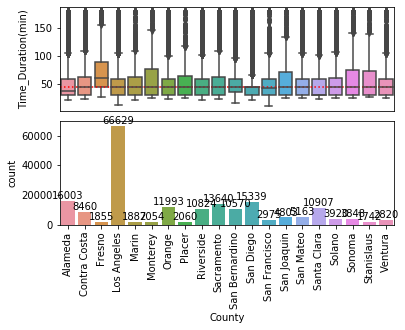

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

top_20 = US_Accidents_Dec20_CA['County'].value_counts()[0:20].index
top_20_neighborhoods = US_Accidents_Dec20_CA[US_Accidents_Dec20_CA['County'].isin(top_20)]
plot_categorical(County=top_20_neighborhoods, data=US_Accidents_Dec20_CA)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


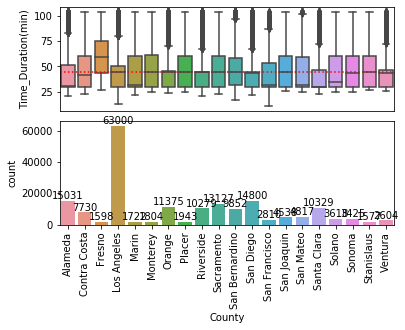

In [61]:
#remove outliers
Q1 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.75)
County = US_Accidents_Dec20_CA.copy()
County = remove_outliers(US_Accidents_Dec20_CA, 'Time_Duration(min)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

top_20 = County['County'].value_counts()[0:20].index
top_20_neighborhoods = County[US_Accidents_Dec20_CA['County'].isin(top_20)]

plot_categorical(County=top_20_neighborhoods, data=County)

## City

In [62]:
US_Accidents_Dec20_CA['City'].value_counts()

Los Angeles      18694
Sacramento        9674
San Diego         7570
San Jose          5840
Oakland           4157
                 ...  
Cassel               1
Colma                1
Challenge            1
Playa del Rey        1
Westwood             1
Name: City, Length: 1023, dtype: int64

In [63]:
def plot_categorical(City, data, with_filter=True):
    if not with_filter:
        City = data
    fig, axs = plt.subplots(nrows=2)
    
    sns.boxplot(
        x='City',
        y='Time_Duration(min)',
        data=City.sort_values('City'),
        ax=axs[0],
    )

    sns.countplot(
        x='City',
        data=City.sort_values('City'),
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=data['Time_Duration(min)'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.1)

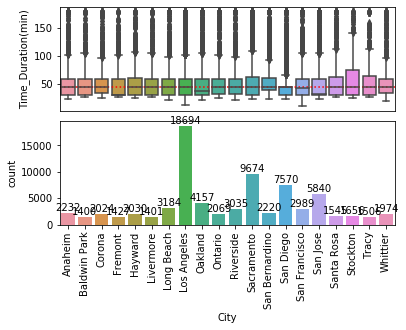

In [64]:
# remove outliers before
top_20 = US_Accidents_Dec20_CA['City'].value_counts()[0:20].index
top_20_neighborhoods = US_Accidents_Dec20_CA[US_Accidents_Dec20_CA['City'].isin(top_20)]
plot_categorical(City=top_20_neighborhoods, data=US_Accidents_Dec20_CA)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


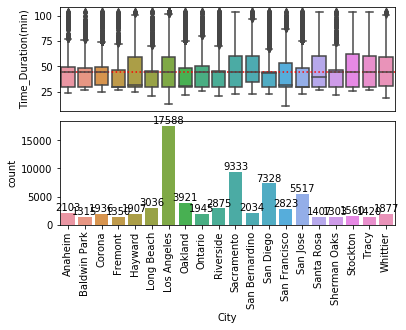

In [65]:
#remove outliers
Q1 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.75)
City = US_Accidents_Dec20_CA.copy()
City = remove_outliers(US_Accidents_Dec20_CA, 'Time_Duration(min)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

top_20 = City['City'].value_counts()[0:20].index
top_20_neighborhoods = City[US_Accidents_Dec20_CA['City'].isin(top_20)]

plot_categorical(City=top_20_neighborhoods, data=City)

## Airport_code

In [66]:
US_Accidents_Dec20_CA['Airport_Code'].value_counts()

KCQT    12098
KEMT     8741
KHHR     8507
KCCR     7932
KOAK     7470
        ...  
KNYL        6
KXVW        5
KNSI        4
KMHS        3
KEDW        1
Name: Airport_Code, Length: 132, dtype: int64

In [67]:
def plot_categorical(Airport_Code, data, with_filter=True):
    if not with_filter:
        Airport_Code = data
    fig, axs = plt.subplots(nrows=2)
    
    sns.boxplot(
        x='Airport_Code',
        y='Time_Duration(min)',
        data=Airport_Code.sort_values('Airport_Code'),
        ax=axs[0],
    )

    sns.countplot(
        x='Airport_Code',
        data=Airport_Code.sort_values('Airport_Code'),
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=data['Time_Duration(min)'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.1)

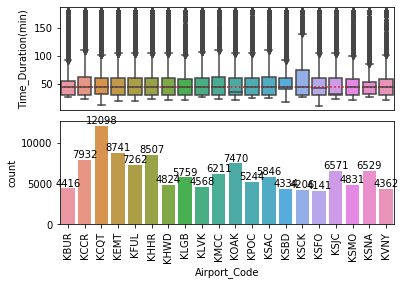

In [68]:
top_20 = US_Accidents_Dec20_CA['Airport_Code'].value_counts()[0:20].index
top_20_neighborhoods = US_Accidents_Dec20_CA[US_Accidents_Dec20_CA['Airport_Code'].isin(top_20)]
plot_categorical(Airport_Code=top_20_neighborhoods, data=US_Accidents_Dec20_CA)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


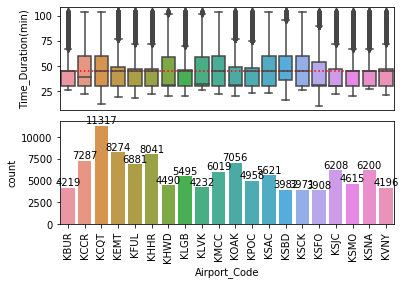

In [69]:
#remove outliers
Q1 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.75)
Airport_Code = US_Accidents_Dec20_CA.copy()
Airport_Code = remove_outliers(US_Accidents_Dec20_CA, 'Time_Duration(min)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

top_20 = Airport_Code['Airport_Code'].value_counts()[0:20].index
top_20_neighborhoods = Airport_Code[US_Accidents_Dec20_CA['Airport_Code'].isin(top_20)]

plot_categorical(Airport_Code=top_20_neighborhoods, data=City)

## 测风速

In [70]:
#remove outliers' function
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    return data.loc[(data[variable] > lower) & (data[variable] < upper), :]

In [71]:
Q1 = np.quantile(US_Accidents_Dec20_CA['Wind_Speed(mph)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Wind_Speed(mph)'], 0.75)
Wind_Speed = US_Accidents_Dec20_CA.copy()
Wind_Speed = remove_outliers(US_Accidents_Dec20_CA, 'Wind_Speed(mph)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

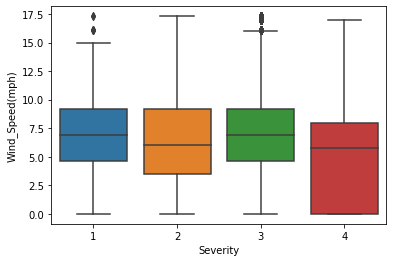

In [72]:
order = Wind_Speed['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Wind_Speed(mph)', data = Wind_Speed, order = order)

没啥卵子用

## 测风向

In [73]:
US_Accidents_Dec20_CA['Wind_Direction'].value_counts()

W       61974
S       38678
CALM    25507
N       17620
VAR     16770
E       16461
SW      13900
NW      11628
SE       7708
NE       3028
Name: Wind_Direction, dtype: int64

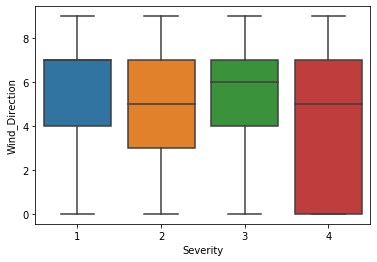

In [74]:
Wind_Direction = US_Accidents_Dec20_CA.copy()

def wind_direction(data):
    data['Wind_Direction'] = data['Wind_Direction'].replace({'CALM': 0, 'N': 1, 'NE':2, 'E': 3, 'SE':4, 'S': 5, 'SW': 6, 'W':7, 'NW':8, 'VAR': 9 })
    return data
    
Wind_Direction = wind_direction(Wind_Direction)

sns.boxplot(x = 'Severity', y='Wind_Direction', data = Wind_Direction)

4 的 0-4 数据很多。可能有关系

## 湿度
一看就没用

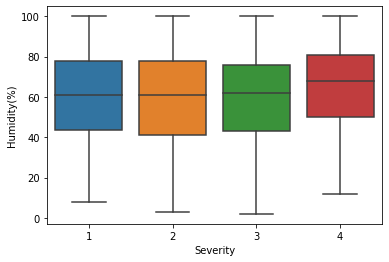

In [75]:
Q1 = np.quantile(US_Accidents_Dec20_CA['Humidity(%)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Humidity(%)'], 0.75)
Humidity = US_Accidents_Dec20_CA.copy()
Humidity = remove_outliers(US_Accidents_Dec20_CA, 'Humidity(%)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

order = Humidity['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Humidity(%)', data = Humidity, order = order)

# 温度

没用的东西

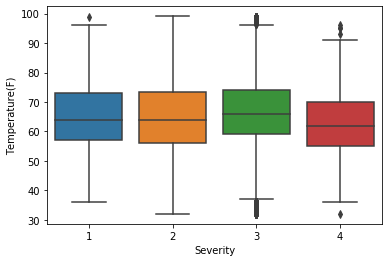

In [76]:
Q1 = np.quantile(US_Accidents_Dec20_CA['Temperature(F)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Temperature(F)'], 0.75)
Temperature = US_Accidents_Dec20_CA.copy()
Temperature = remove_outliers(US_Accidents_Dec20_CA, 'Temperature(F)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

order = Temperature['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Temperature(F)', data = Temperature, order = order)

## 气压

好像有一丢丢用

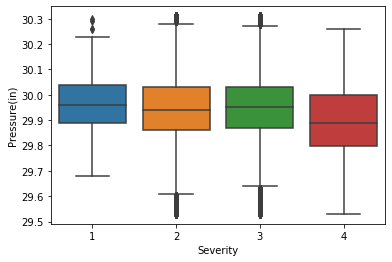

In [77]:
Q1 = np.quantile(US_Accidents_Dec20_CA['Pressure(in)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Pressure(in)'], 0.75)

Pressure = US_Accidents_Dec20_CA.copy()
Pressure = remove_outliers(US_Accidents_Dec20_CA, 'Pressure(in)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

order = Pressure['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Pressure(in)', data = Pressure, order = order)

## Visibility

大部分都在10这个数据，所以浓见度感觉也没太必要

In [78]:
US_Accidents_Dec20_CA['Visibility(mi)'].value_counts()

10.00     170713
9.00        7692
7.00        7123
8.00        5978
6.00        4697
5.00        4398
4.00        3253
3.00        2888
2.00        2367
1.00        1161
2.50         672
0.25         525
0.50         309
1.50         245
1.80         239
0.00         229
0.20         144
1.20         119
0.80         119
0.75         113
0.12          53
30.00         46
40.00         45
80.00         32
25.00         32
20.00         22
0.06          12
0.38          10
0.10           8
100.00         7
4.20           5
0.63           5
15.00          4
5.50           3
0.88           2
0.19           1
12.00          1
50.00          1
0.40           1
Name: Visibility(mi), dtype: int64

10.0 10.0


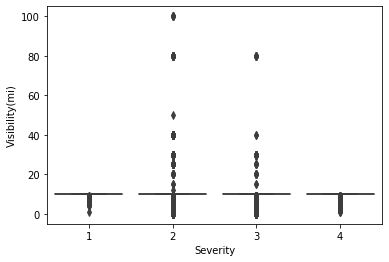

In [79]:
Q1 = np.quantile(US_Accidents_Dec20_CA['Visibility(mi)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Visibility(mi)'], 0.75)
print(Q1, Q3)

Visibility = US_Accidents_Dec20_CA.copy()

order = Visibility['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Visibility(mi)', data = Visibility, order = order)

## Weather Condition

In [80]:
US_Accidents_Dec20_CA['Weather_Condition'].value_counts()

Clear           118453
Cloudy           73189
Rain             10714
Fog               7847
Smoke             2071
Windy              740
Snow               118
Thunderstorm       113
Sand                27
Hail                 1
Name: Weather_Condition, dtype: int64

In [81]:
def plot_categorical(Weather_Condition, data, with_filter=True):
    if not with_filter:
        Weather_Condition = data
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Weather_Condition',
        y='Time_Duration(min)',
        data=Weather_Condition.sort_values('Weather_Condition'),
        ax=axs[0],
    )

    sns.countplot(
        x='Weather_Condition',
        data=Weather_Condition.sort_values('Weather_Condition'),
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=data['Severity'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.1)

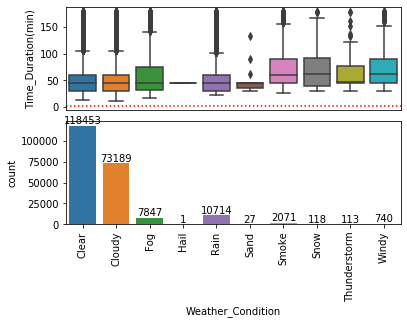

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

top_20 = US_Accidents_Dec20_CA['Weather_Condition'].value_counts().index
top_20_neighborhoods = US_Accidents_Dec20_CA[US_Accidents_Dec20_CA['Weather_Condition'].isin(top_20)]

plot_categorical(Weather_Condition=top_20_neighborhoods, data=US_Accidents_Dec20_CA)

## Side (Left side or Right side)

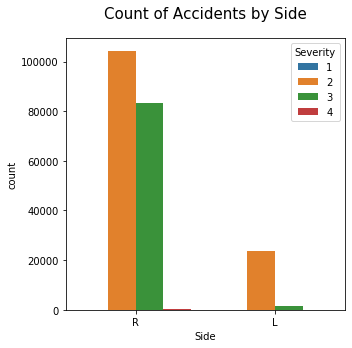

In [83]:
plt.figure(figsize=(5,5))
sns.countplot(x='Side', hue='Severity', data=US_Accidents_Dec20_CA)
plt.title("Count of Accidents by Side", size=15, y=1.05)
plt.show()

In [84]:
US_Accidents_Dec20_CA[['Severity', 'Time_Duration(min)']].groupby('Severity').min()

,Time_Duration(min)
Severity,
1,29.0
2,11.0
3,20.0
4,28.0


In [85]:
US_Accidents_Dec20_CA[['Severity', 'Time_Duration(min)']].groupby('Severity').max()

,Time_Duration(min)
Severity,
1,150.000000
2,179.366168
3,179.366168
4,179.366168


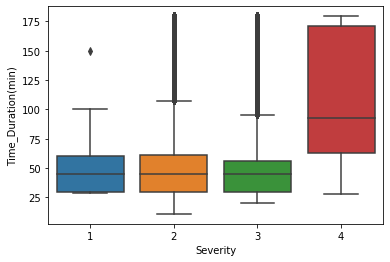

In [86]:
order = US_Accidents_Dec20_CA['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Time_Duration(min)', data = US_Accidents_Dec20_CA, order = order)

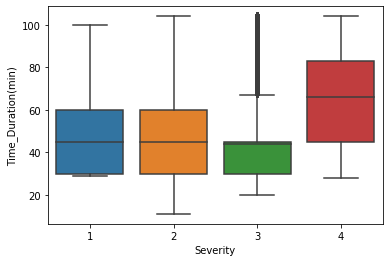

In [87]:
Q1 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.75)
Time_Duration = US_Accidents_Dec20_CA.copy()
Time_Duration = remove_outliers(US_Accidents_Dec20_CA, 'Time_Duration(min)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

order = Time_Duration['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Time_Duration(min)', data = Time_Duration, order = order)

# Set up models

## Select features

In [40]:
US_Accidents_Dec20_CA.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'County', 'Airport_Code', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Year', 'Month',
       'Day', 'Hour', 'Weekday', 'Time_Duration(min)'],
      dtype='object')

In [41]:
full_data = US_Accidents_Dec20_CA[['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 
                                   'County', 'Pressure(in)',  'Wind_Direction','Weather_Condition',
                                   'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                                   'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                                   'Traffic_Signal', 'Sunrise_Sunset', 'Year', 'Month',
                                   'Day', 'Hour', 'Weekday', 'Time_Duration(min)']]

In [42]:
full_data.iloc[0,:]

Severity                    3
Start_Lat             38.0853
Start_Lng            -122.233
Distance(mi)                0
Side                        R
County                 Solano
Pressure(in)               30
Wind_Direction            VAR
Weather_Condition       Clear
Amenity                 False
Bump                    False
Crossing                False
Give_Way                False
Junction                False
No_Exit                 False
Railway                 False
Roundabout              False
Station                 False
Stop                    False
Traffic_Calming         False
Traffic_Signal          False
Sunrise_Sunset            Day
Year                     2016
Month                     Jun
Day                        21
Hour                       10
Weekday                   Tue
Time_Duration(min)         30
Name: 0, dtype: object

In [43]:
full_data

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,County,Pressure(in),Wind_Direction,Weather_Condition,Amenity,...,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration(min)
0,3,38.085300,-122.233017,0.0,R,Solano,30.00,VAR,Clear,False,...,False,False,False,Day,2016,Jun,21,10,Tue,30.0
1,3,37.631813,-122.084167,0.0,R,Alameda,30.06,W,Clear,False,...,False,False,False,Day,2016,Jun,21,10,Tue,46.0
2,2,37.896564,-122.070717,0.0,R,Contra Costa,29.97,N,Clear,False,...,False,False,False,Day,2016,Jun,21,10,Tue,30.0
3,3,37.334255,-122.032471,0.0,R,Santa Clara,30.04,N,Clear,False,...,False,False,False,Day,2016,Jun,21,10,Tue,30.0
4,2,37.250729,-121.910713,0.0,R,Santa Clara,30.06,VAR,Clear,False,...,False,False,False,Day,2016,Jun,21,10,Tue,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260381,2,34.123230,-118.341896,0.0,R,Los Angeles,29.00,S,Clear,False,...,False,False,False,Night,2019,Oct,9,19,Wed,48.0
260382,3,34.068192,-117.978111,0.0,R,Los Angeles,29.72,SW,Cloudy,False,...,False,False,False,Night,2019,Oct,9,19,Wed,28.0
260383,3,33.928146,-118.239166,0.0,R,Los Angeles,29.77,CALM,Cloudy,False,...,False,False,False,Night,2019,Oct,9,20,Wed,30.0
260384,3,33.930241,-118.280624,0.0,R,Los Angeles,29.77,CALM,Cloudy,False,...,False,False,False,Night,2019,Oct,9,20,Wed,47.0


In [44]:
#full_data = full_data.replace([True, False], [1,0])
#full_data

In [45]:
full_data['Severity'] >= 3

0          True
1          True
2         False
3          True
4         False
          ...  
260381    False
260382     True
260383     True
260384     True
260385     True
Name: Severity, Length: 213274, dtype: bool

In [46]:
full_data['Severity3']= (full_data['Severity'] >= 3).astype(int)
full_data

<ipython-input-46-504ea1b57b6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['Severity3']= (full_data['Severity'] >= 3).astype(int)


,Severity,Start_Lat,Start_Lng,Distance(mi),Side,County,Pressure(in),Wind_Direction,Weather_Condition,Amenity,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration(min),Severity3
0,3,38.085300,-122.233017,0.0,R,Solano,30.00,VAR,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,30.0,1
1,3,37.631813,-122.084167,0.0,R,Alameda,30.06,W,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,46.0,1
2,2,37.896564,-122.070717,0.0,R,Contra Costa,29.97,N,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,30.0,0
3,3,37.334255,-122.032471,0.0,R,Santa Clara,30.04,N,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,30.0,1
4,2,37.250729,-121.910713,0.0,R,Santa Clara,30.06,VAR,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260381,2,34.123230,-118.341896,0.0,R,Los Angeles,29.00,S,Clear,False,...,False,False,Night,2019,Oct,9,19,Wed,48.0,0
260382,3,34.068192,-117.978111,0.0,R,Los Angeles,29.72,SW,Cloudy,False,...,False,False,Night,2019,Oct,9,19,Wed,28.0,1
260383,3,33.928146,-118.239166,0.0,R,Los Angeles,29.77,CALM,Cloudy,False,...,False,False,Night,2019,Oct,9,20,Wed,30.0,1
260384,3,33.930241,-118.280624,0.0,R,Los Angeles,29.77,CALM,Cloudy,False,...,False,False,Night,2019,Oct,9,20,Wed,47.0,1


In [47]:
full_data =full_data.rename(columns = {'Distance(mi)': 'Distance', 'Pressure(in)' : 'Pressure', 'Time_Duration(min)': 'Time_Duration'})
full_data

,Severity,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration,Severity3
0,3,38.085300,-122.233017,0.0,R,Solano,30.00,VAR,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,30.0,1
1,3,37.631813,-122.084167,0.0,R,Alameda,30.06,W,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,46.0,1
2,2,37.896564,-122.070717,0.0,R,Contra Costa,29.97,N,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,30.0,0
3,3,37.334255,-122.032471,0.0,R,Santa Clara,30.04,N,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,30.0,1
4,2,37.250729,-121.910713,0.0,R,Santa Clara,30.06,VAR,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260381,2,34.123230,-118.341896,0.0,R,Los Angeles,29.00,S,Clear,False,...,False,False,Night,2019,Oct,9,19,Wed,48.0,0
260382,3,34.068192,-117.978111,0.0,R,Los Angeles,29.72,SW,Cloudy,False,...,False,False,Night,2019,Oct,9,19,Wed,28.0,1
260383,3,33.928146,-118.239166,0.0,R,Los Angeles,29.77,CALM,Cloudy,False,...,False,False,Night,2019,Oct,9,20,Wed,30.0,1
260384,3,33.930241,-118.280624,0.0,R,Los Angeles,29.77,CALM,Cloudy,False,...,False,False,Night,2019,Oct,9,20,Wed,47.0,1


# 第一版model 含有月份 不加人口密度

## Set up training data and test data

In [68]:
full_data['Year'].value_counts()

2016    80100
2020    71262
2017    51706
2019    10206
Name: Year, dtype: int64

In [69]:
len(full_data[full_data['Year']==2020])/len(full_data)

0.33413355589523336

In [70]:
full_data['Severity3']

0         1
1         1
2         0
3         1
4         0
         ..
260381    0
260382    1
260383    1
260384    1
260385    1
Name: Severity3, Length: 213274, dtype: int64

In [71]:
size = len(full_data[full_data["Severity3"]==1].index)
df = pd.DataFrame()
for i in range(0,2):
    S = full_data[full_data["Severity3"]==i]
    df = df.append(S.sample(size, random_state=88))
full_data = df

/home/lmh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


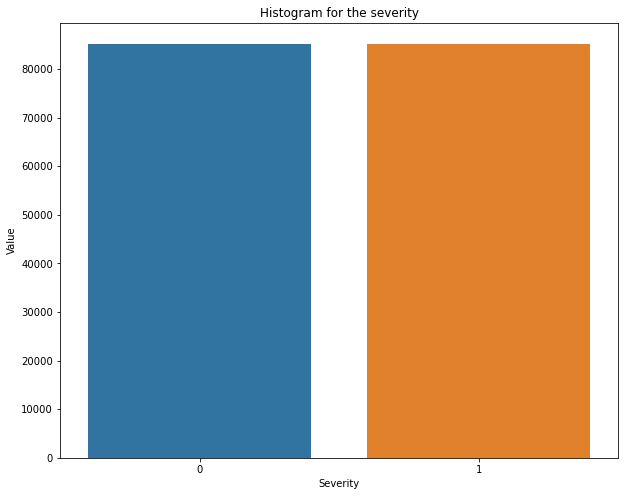

,Severity,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration,Severity3
26815,2,38.742622,-121.158356,0.00,R,Placer,29.82,S,Clear,False,...,False,False,Day,2016,Aug,16,15,Tue,75.0,0
222458,2,37.609470,-120.993660,0.00,L,Stanislaus,29.80,N,Clear,False,...,False,False,Day,2020,Jun,15,18,Mon,94.0,0
47745,2,33.859798,-118.036140,0.00,R,Orange,29.98,SW,Clear,False,...,False,False,Day,2016,Jul,13,11,Wed,38.0,0
118543,2,34.153324,-118.277985,0.01,R,Los Angeles,30.09,N,Clear,False,...,False,False,Night,2017,Jan,30,22,Mon,30.0,0
28176,2,37.243034,-121.804031,0.00,R,Santa Clara,30.03,SW,Clear,False,...,False,False,Day,2016,Aug,27,11,Sat,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119118,3,34.072968,-117.778290,0.01,R,Los Angeles,30.10,W,Clear,False,...,False,False,Day,2017,Feb,2,16,Thu,29.0,1
180541,3,34.041882,-118.276825,0.00,L,Los Angeles,29.90,W,Clear,False,...,False,False,Day,2020,Dec,6,16,Sun,30.0,1
163479,3,33.901882,-118.286903,0.00,R,Los Angeles,29.97,SE,Clear,False,...,False,True,Night,2017,Jun,12,0,Mon,44.0,1
7174,3,37.740681,-122.196281,0.01,R,Alameda,30.24,S,Cloudy,False,...,False,False,Day,2016,Dec,20,14,Tue,30.0,1


In [72]:
severity_counts = full_data["Severity3"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()
full_data

In [73]:
full_data.iloc[0,:]

Severity                   2
Start_Lat            38.7426
Start_Lng           -121.158
Distance                   0
Side                       R
County                Placer
Pressure               29.82
Wind_Direction             S
Weather_Condition      Clear
Amenity                False
Bump                   False
Crossing               False
Give_Way               False
Junction               False
No_Exit                False
Railway                False
Roundabout             False
Station                False
Stop                   False
Traffic_Calming        False
Traffic_Signal         False
Sunrise_Sunset           Day
Year                    2016
Month                    Aug
Day                       16
Hour                      15
Weekday                  Tue
Time_Duration             75
Severity3                  0
Name: 26815, dtype: object

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['Pressure','Distance','Start_Lng','Start_Lat','Year','Day','Hour','Time_Duration']
full_data[features] = scaler.fit_transform(full_data[features])
full_data.head()

,Severity,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration,Severity3
26815,2,0.656068,0.325703,0.000000,R,Placer,0.971025,S,Clear,False,...,False,False,Day,0.00,Aug,0.500000,0.652174,Tue,0.380124,0
222458,2,0.536161,0.342409,0.000000,L,Stanislaus,0.970301,N,Clear,False,...,False,False,Day,1.00,Jun,0.466667,0.782609,Mon,0.492973,0
47745,2,0.139383,0.642412,0.000000,R,Orange,0.976820,SW,Clear,False,...,False,False,Day,0.00,Jul,0.400000,0.478261,Wed,0.160365,0
118543,2,0.170443,0.617880,0.007251,R,Los Angeles,0.980804,N,Clear,False,...,False,False,Night,0.25,Jan,0.966667,0.956522,Mon,0.112849,0
28176,2,0.497386,0.260207,0.000000,R,Santa Clara,0.978631,SW,Clear,False,...,False,False,Day,0.00,Aug,0.866667,0.478261,Sat,0.112849,0


In [75]:
training_data = full_data[full_data['Year']< 2020 ].drop(['Year', 'Severity'], axis=1)
testing_data = full_data[full_data['Year']== 2020].drop(['Year', 'Severity'], axis=1)
# training_data = full_data[full_data['Year']< 2020 ].drop(['Year','Severity4'], axis=1)
# testing_data = full_data[full_data['Year']== 2020].drop(['Year','Severity4'], axis=1)

In [76]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170424 entries, 26815 to 108155
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Start_Lat          170424 non-null  float64
 1   Start_Lng          170424 non-null  float64
 2   Distance           170424 non-null  float64
 3   Side               170424 non-null  object 
 4   County             170424 non-null  object 
 5   Pressure           170424 non-null  float64
 6   Wind_Direction     170424 non-null  object 
 7   Weather_Condition  170423 non-null  object 
 8   Amenity            170424 non-null  bool   
 9   Bump               170424 non-null  bool   
 10  Crossing           170424 non-null  bool   
 11  Give_Way           170424 non-null  bool   
 12  Junction           170424 non-null  bool   
 13  No_Exit            170424 non-null  bool   
 14  Railway            170424 non-null  bool   
 15  Roundabout         170424 non-null  bool   
 16

In [77]:
training_data

,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,Bump,...,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Month,Day,Hour,Weekday,Time_Duration,Severity3
26815,0.656068,0.325703,0.000000,R,Placer,0.971025,S,Clear,False,False,...,False,False,False,Day,Aug,0.500000,0.652174,Tue,0.380124,0
222458,0.536161,0.342409,0.000000,L,Stanislaus,0.970301,N,Clear,False,False,...,False,False,False,Day,Jun,0.466667,0.782609,Mon,0.492973,0
47745,0.139383,0.642412,0.000000,R,Orange,0.976820,SW,Clear,False,False,...,False,False,False,Day,Jul,0.400000,0.478261,Wed,0.160365,0
118543,0.170443,0.617880,0.007251,R,Los Angeles,0.980804,N,Clear,False,False,...,False,False,False,Night,Jan,0.966667,0.956522,Mon,0.112849,0
28176,0.497386,0.260207,0.000000,R,Santa Clara,0.978631,SW,Clear,False,False,...,False,False,False,Day,Aug,0.866667,0.478261,Sat,0.112849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119118,0.161940,0.668567,0.007251,R,Los Angeles,0.981166,W,Clear,False,False,...,False,False,False,Day,Feb,0.033333,0.695652,Thu,0.106910,1
180541,0.158651,0.617997,0.000000,L,Los Angeles,0.973922,W,Clear,False,False,...,False,False,False,Day,Dec,0.166667,0.695652,Sun,0.112849,1
163479,0.143836,0.616975,0.000000,R,Los Angeles,0.976458,SE,Clear,False,False,...,False,False,True,Night,Jun,0.366667,0.000000,Mon,0.196001,1
7174,0.550045,0.220418,0.007251,R,Alameda,0.986237,S,Cloudy,False,False,...,False,False,False,Day,Dec,0.633333,0.608696,Tue,0.112849,1


In [78]:
training_data = training_data.replace([True, False], [1,0])

cat = ['Side','Wind_Direction','Weekday', 'County', 'Weather_Condition', 'Sunrise_Sunset', 'Month']
training_data[cat] = training_data[cat].astype('category')
training_data = pd.get_dummies(training_data, columns=cat, drop_first=True)

#df_int = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
#df_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
#df = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)
training_data.iloc[0,:]

Start_Lat    0.656068
Start_Lng    0.325703
Distance     0.000000
Pressure     0.971025
Amenity      0.000000
               ...   
Month_Mar    0.000000
Month_May    0.000000
Month_Nov    0.000000
Month_Oct    0.000000
Month_Sep    0.000000
Name: 26815, Length: 112, dtype: float64

In [79]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [ ]:
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

### logistic regression

第一个model，含有月份

In [249]:
from sklearn.model_selection import train_test_split
y = training_data['Severity3']
X = training_data.drop(['Severity3'], axis = 1)
# y = training_data['Severity']
# X = training_data.drop(['Severity'], axis = 1)


X_train, X_validate, y_train, y_validate = train_test_split(X,y, test_size=0.3,stratify=training_data['Severity3'],random_state=88)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=training_data['Severity'],random_state=88)
#y_train = pd.Series(y_train)
X_train.shape,X_validate.shape,y_train.shape,y_validate.shape

((119296, 112), (51128, 112), (119296,), (51128,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
clf_base = LogisticRegression()
grid = {'C': 10.0 ** np.arange(-2, 3),
        'class_weight': ['balanced']}
clf_lr = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_lr.fit(X_train, y_train)

In [250]:
print("Best parameters scores:")
print(clf_lr.best_params_)
print("Train score:", clf_lr.score(X_train, y_train))
print("Validation score:", clf_lr.score(X_validate, y_validate))

coef = clf_lr.best_estimator_.coef_
intercept = clf_lr.best_estimator_.intercept_
print (classification_report(y_validate, clf_lr.predict(X_validate)))

Best parameters scores:
{'C': 10.0, 'class_weight': 'balanced'}
Train score: 0.7206239681745239
Validation score: 0.7238661247486042
              precision    recall  f1-score   support

           0       0.77      0.64      0.70     25564
           1       0.69      0.81      0.75     25564

    accuracy                           0.73     51128
   macro avg       0.73      0.73      0.72     51128
weighted avg       0.73      0.73      0.72     51128



In [251]:
lr = LogisticRegression(**clf_lr.best_params_)
print("Default scores:")
lr.fit(X_train, y_train)
print("Train score:", lr.score(X_train, y_train))
print("Validation score:", lr.score(X_validate, y_validate))

Default scores:
Train score: 0.7227484576180258
Validation score: 0.7260405257393209


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [253]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = lr.predict(X_validate)

accuracy["Logistic Regression"] = accuracy_score(y_validate, y_pred)
f1["Logistic Regression"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, lr.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     59648
           1       0.69      0.81      0.74     59648

    accuracy                           0.72    119296
   macro avg       0.73      0.72      0.72    119296
weighted avg       0.73      0.72      0.72    119296

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     25564
           1       0.69      0.81      0.75     25564

    accuracy                           0.73     51128
   macro avg       0.73      0.73      0.72     51128
weighted avg       0.73      0.73      0.72     51128



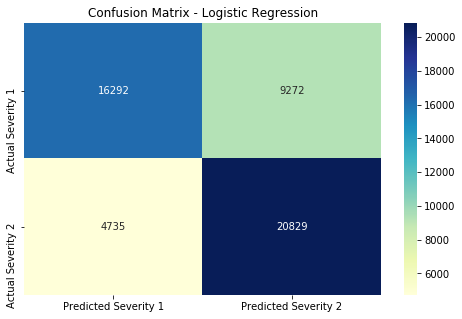

In [257]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

[[0.49630037 0.50369963]
 [0.98592682 0.01407318]
 [0.8073424  0.1926576 ]
 ...
 [0.88388985 0.11611015]
 [0.97954772 0.02045228]
 [0.23192095 0.76807905]]


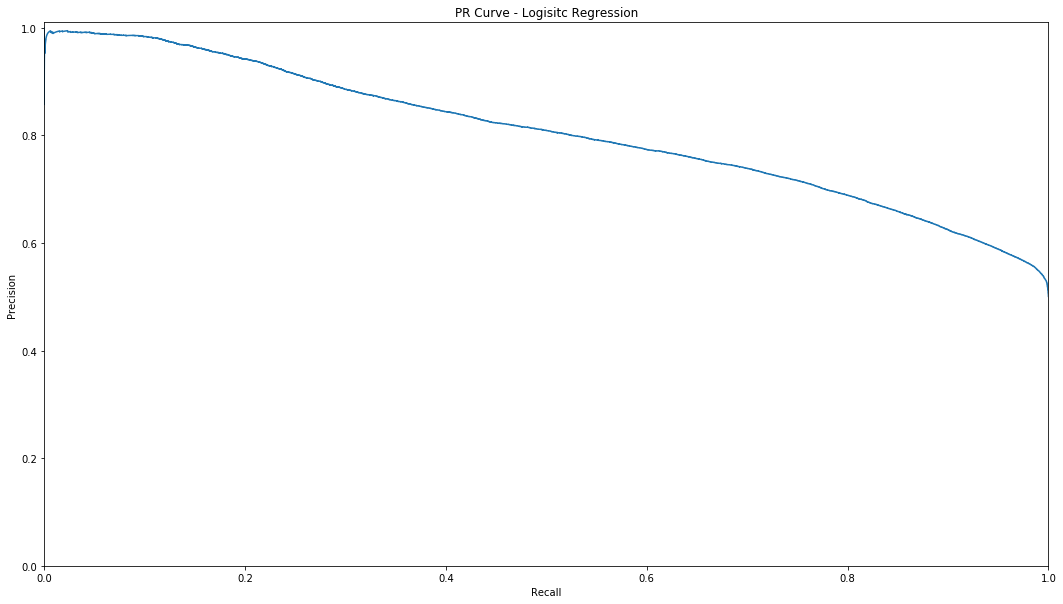

In [283]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Y = label_binarize(y_validate, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = lr.predict_proba(X_validate)
print(y_score)
precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logisitc Regression")
plt.show()

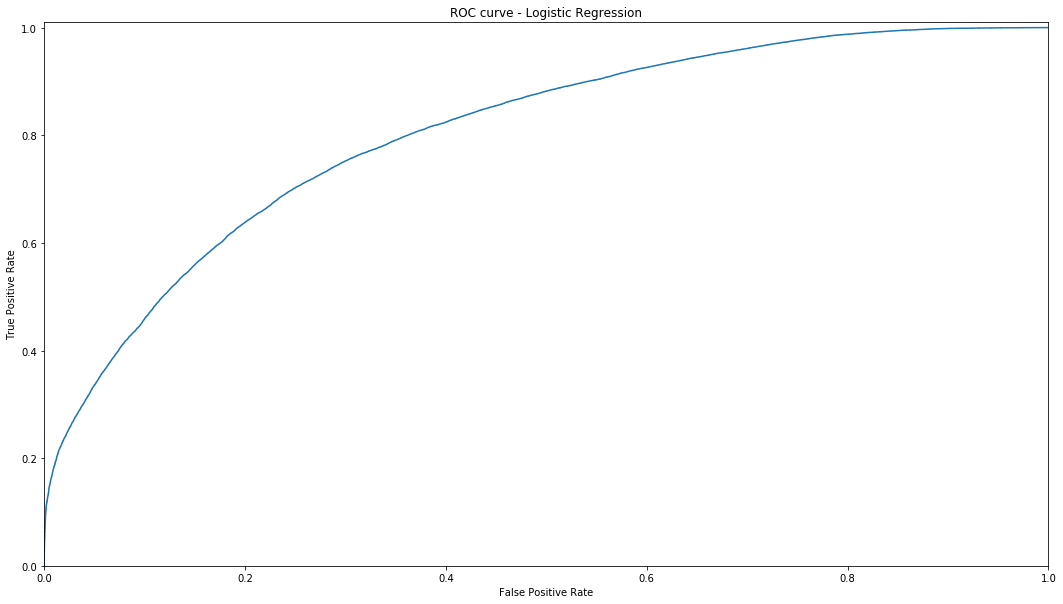

In [284]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

## Random Forest

In [129]:
# 不用看，留着
import time
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

# grid_values = {'max_features': np.linspace(1,111,111, dtype='int32'),
#                'min_samples_leaf': [5],
#                'n_estimators': [500],
#                'random_state': [88]} 
grid_values = {"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}

tic = time.time()

rf2 = RandomForestRegressor() 

cv = KFold(n_splits=5,random_state=333,shuffle=True) 
grid = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
grid.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')
print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 111 candidates, totalling 555 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.7s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.8s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   9.2s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   9.4s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   9.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   9.1s
[CV] END max_features=2, min_samples_leaf=5, n

KeyboardInterrupt: 

In [ ]:
rf2 = RandomForestRegressor(**grid.best_params_)

print("Default scores:")
rf2.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_validate, y_validate))
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

In [ ]:
y_pred = rfc.predict(X_validate)

accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
f1["Random Forest"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_validate, y_pred))

In [ ]:
y_pred = rfc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

In [ ]:
enc = OneHotEncoder()
Y = label_binarize(y_validate, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = rfc.predict_proba(X_validate)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

In [ ]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [ ]:
#不用看，留着
# max_features = rf_cv.cv_results_['param_max_features'].data
# R2_scores = rf_cv.cv_results_['mean_test_score']

# plt.figure(figsize=(8, 6))
# plt.xlabel('max features', fontsize=16)
# plt.ylabel('CV R2', fontsize=16)
# plt.scatter(max_features, R2_scores, s=30)
# plt.plot(max_features, R2_scores, linewidth=3)
# plt.grid(True, which='both')

In [ ]:
#不用看，留着
# print(rf_cv.best_params_)

In [ ]:
#不用看，留着
# def OSR2(model, X_test, y_test, y_train):
    
#     y_pred = model.predict(X_test)
#     SSE = np.sum((y_test - y_pred)**2)
#     SST = np.sum((y_test - np.mean(y_train))**2)
                 
#     return (1 - SSE/SST)
# print('Cross-validated R2:', round(rf_cv.best_score_, 5))
# print('OSR2:', round(OSR2(rf_cv, X_test, y_test, y_train), 5))

In [ ]:
# clf_base = RandomForestClassifier()
# grid = {'n_estimators': [10, 50, 111],
#         'max_features': ['auto','sqrt']}
# clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

# clf_rf.fit(X_train, y_train)
# y_pred = clf_rf.predict(X_test)

# print (classification_report(y_test, y_pred))

## Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Train score:", gnb.score(X_train, y_train))
print("Validation score:", gnb.score(X_validate, y_validate))

In [ ]:
y_pred = gnb.predict(X_validate)

accuracy["Gaussian Naive Bayes"] = accuracy_score(y_validate, y_pred)
f1["Gaussian Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, gnb.predict(X_train)))
print(classification_report(y_validate, y_pred))

In [ ]:
y_pred = gnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

In [ ]:
enc = OneHotEncoder()
Y = label_binarize(y_validate, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = gnb.predict_proba(X_validate)

precision["Gaussian Naive Bayes"], recall["Gaussian Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Gaussian Naive Bayes"], precision["Gaussian Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Gaussian Naive Bayes")
plt.show()

## Results

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("F1 Score on Validation set for each model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.show()

# 第二个model，加入population density，含有月份

In [80]:
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [81]:
CA_popdensity = pd.read_csv("CA_pop_density.csv")
scaler = MinMaxScaler()
features = ['Population Density']
CA_popdensity[features] = scaler.fit_transform(CA_popdensity[features])
CA_popdensity

,County,Population Density
0,Alameda,0.118876
1,Alpine,0.000000
2,Amador,0.003638
3,Butte,0.007731
4,Calaveras,0.002509
5,Colusa,0.000990
6,Contra Costa,0.085204
7,Del Norte,0.001560
8,El Dorado,0.006078
9,Fresno,0.009000


In [82]:
full_data

,Severity,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration,Severity3
26815,2,0.656068,0.325703,0.000000,R,Placer,0.971025,S,Clear,False,...,False,False,Day,0.00,Aug,0.500000,0.652174,Tue,0.380124,0
222458,2,0.536161,0.342409,0.000000,L,Stanislaus,0.970301,N,Clear,False,...,False,False,Day,1.00,Jun,0.466667,0.782609,Mon,0.492973,0
47745,2,0.139383,0.642412,0.000000,R,Orange,0.976820,SW,Clear,False,...,False,False,Day,0.00,Jul,0.400000,0.478261,Wed,0.160365,0
118543,2,0.170443,0.617880,0.007251,R,Los Angeles,0.980804,N,Clear,False,...,False,False,Night,0.25,Jan,0.966667,0.956522,Mon,0.112849,0
28176,2,0.497386,0.260207,0.000000,R,Santa Clara,0.978631,SW,Clear,False,...,False,False,Day,0.00,Aug,0.866667,0.478261,Sat,0.112849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119118,3,0.161940,0.668567,0.007251,R,Los Angeles,0.981166,W,Clear,False,...,False,False,Day,0.25,Feb,0.033333,0.695652,Thu,0.106910,1
180541,3,0.158651,0.617997,0.000000,L,Los Angeles,0.973922,W,Clear,False,...,False,False,Day,1.00,Dec,0.166667,0.695652,Sun,0.112849,1
163479,3,0.143836,0.616975,0.000000,R,Los Angeles,0.976458,SE,Clear,False,...,False,True,Night,0.25,Jun,0.366667,0.000000,Mon,0.196001,1
7174,3,0.550045,0.220418,0.007251,R,Alameda,0.986237,S,Cloudy,False,...,False,False,Day,0.00,Dec,0.633333,0.608696,Tue,0.112849,1


In [83]:
full_data_new = pd.merge(full_data, CA_popdensity)
full_data_new

,Severity,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,...,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration,Severity3,Population Density
0,2,0.656068,0.325703,0.0,R,Placer,0.971025,S,Clear,False,...,False,Day,0.00,Aug,0.500000,0.652174,Tue,0.380124,0,0.014321
1,2,0.687975,0.335225,0.0,R,Placer,0.980080,S,Clear,False,...,False,Day,0.00,Aug,0.733333,0.608696,Tue,0.112849,0,0.014321
2,2,0.660935,0.319172,0.0,R,Placer,0.967403,SE,Clear,False,...,False,Day,1.00,Jun,0.733333,0.304348,Tue,0.106910,0,0.014321
3,2,0.659990,0.314366,0.0,R,Placer,0.974647,W,Clear,False,...,False,Day,0.00,Sep,0.466667,0.782609,Thu,0.112849,0,0.014321
4,2,0.665904,0.324670,0.0,R,Placer,0.979717,S,Clear,False,...,True,Day,0.00,Jun,0.733333,0.391304,Thu,0.201941,0,0.014321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170419,2,0.019998,0.988487,0.0,R,Imperial,0.964143,E,Clear,False,...,False,Day,1.00,Oct,0.600000,0.565217,Mon,0.112849,0,0.002340
170420,2,0.020483,0.988230,0.0,L,Imperial,0.967041,CALM,Cloudy,False,...,False,Night,0.75,Dec,0.233333,0.826087,Sun,0.237577,0,0.002340
170421,3,0.020103,0.988099,1.0,R,Imperial,0.971025,S,Clear,False,...,False,Day,1.00,Mar,0.433333,0.608696,Sat,0.106910,1,0.002340
170422,3,0.019998,0.988487,0.0,R,Imperial,0.960522,S,Clear,False,...,False,Night,0.75,Dec,0.433333,0.739130,Sat,0.112849,1,0.002340


In [84]:
training_data = full_data_new[full_data_new['Year']< 2020 ].drop(['Year', 'Severity'], axis=1)
testing_data = full_data_new[full_data_new['Year']== 2020].drop(['Year', 'Severity'], axis=1)
training_data = training_data.replace([True, False], [1,0])

cat = ['Side','Wind_Direction','Weekday', 'County', 'Weather_Condition', 'Sunrise_Sunset', 'Month']
training_data[cat] = training_data[cat].astype('category')
training_data = pd.get_dummies(training_data, columns=cat, drop_first=True)

#df_int = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
#df_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
#df = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)
training_data.columns

Index(['Start_Lat', 'Start_Lng', 'Distance', 'Pressure', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       ...
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object', length=113)

In [85]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

### logistic regression

第一个model，含有月份

In [86]:
from sklearn.model_selection import train_test_split
y = training_data['Severity3']
X = training_data.drop(['Severity3'], axis = 1)
# y = training_data['Severity']
# X = training_data.drop(['Severity'], axis = 1)


X_train, X_validate, y_train, y_validate = train_test_split(X,y, test_size=0.3,stratify=training_data['Severity3'],random_state=88)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=training_data['Severity'],random_state=88)
#y_train = pd.Series(y_train)
X_train.shape,X_validate.shape,y_train.shape,y_validate.shape

((119296, 112), (51128, 112), (119296,), (51128,))

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
clf_base = LogisticRegression()
grid = {'C': 10.0 ** np.arange(-2, 3),
        'class_weight': ['balanced']}
clf_lr = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_lr.fit(X_train, y_train)

/home/lmh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'class_weight': ['balanced']},
             scoring='f1_macro')

In [88]:
print("Best parameters scores:")
print(clf_lr.best_params_)
print("Train score:", clf_lr.score(X_train, y_train))
print("Validation score:", clf_lr.score(X_validate, y_validate))

coef = clf_lr.best_estimator_.coef_
intercept = clf_lr.best_estimator_.intercept_
print (classification_report(y_validate, clf_lr.predict(X_validate)))

Best parameters scores:
{'C': 10.0, 'class_weight': 'balanced'}
Train score: 0.7206239681745239
Validation score: 0.7238661247486042
              precision    recall  f1-score   support

           0       0.77      0.64      0.70     25564
           1       0.69      0.81      0.75     25564

    accuracy                           0.73     51128
   macro avg       0.73      0.73      0.72     51128
weighted avg       0.73      0.73      0.72     51128



In [89]:
lr = LogisticRegression(**clf_lr.best_params_)
print("Default scores:")
lr.fit(X_train, y_train)
print("Train score:", lr.score(X_train, y_train))
print("Validation score:", lr.score(X_validate, y_validate))

Default scores:


/home/lmh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score: 0.7227484576180258
Validation score: 0.7260405257393209


In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = lr.predict(X_validate)

accuracy["Logistic Regression"] = accuracy_score(y_validate, y_pred)
f1["Logistic Regression"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, lr.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     59648
           1       0.69      0.81      0.74     59648

    accuracy                           0.72    119296
   macro avg       0.73      0.72      0.72    119296
weighted avg       0.73      0.72      0.72    119296

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     25564
           1       0.69      0.81      0.75     25564

    accuracy                           0.73     51128
   macro avg       0.73      0.73      0.72     51128
weighted avg       0.73      0.73      0.72     51128



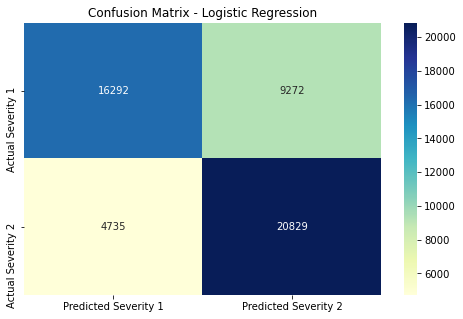

In [91]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

[[0.49630057 0.50369943]
 [0.98592681 0.01407319]
 [0.80734231 0.19265769]
 ...
 [0.88388978 0.11611022]
 [0.9795477  0.0204523 ]
 [0.23192098 0.76807902]]


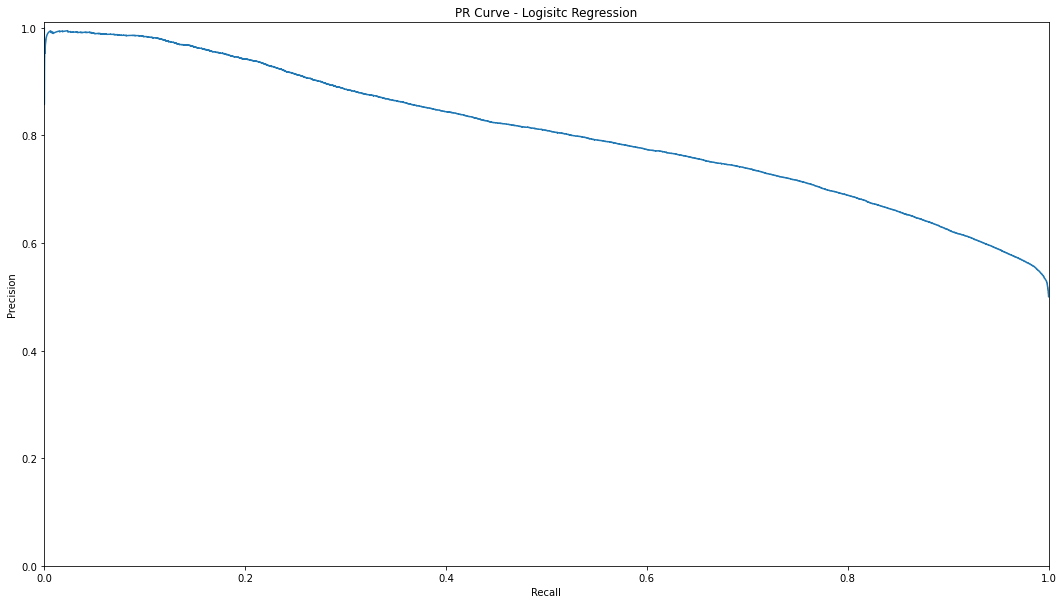

In [92]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Y = label_binarize(y_validate, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = lr.predict_proba(X_validate)
print(y_score)
precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logisitc Regression")
plt.show()

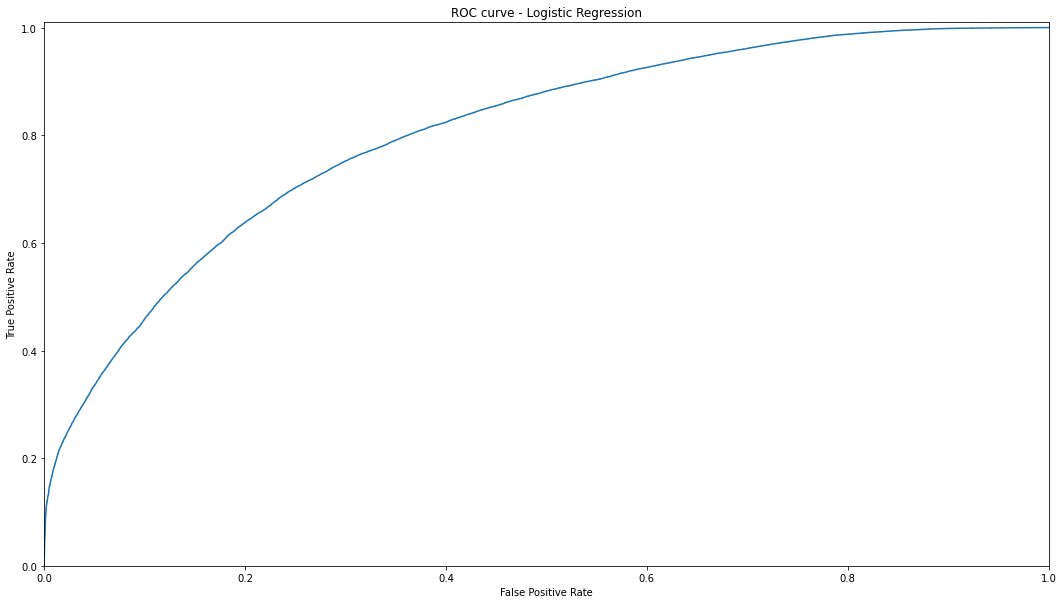

In [93]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

## Random Forest

In [95]:
# 不用看，留着
import time
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

# grid_values = {'max_features': np.linspace(1,111,111, dtype='int32'),
#                'min_samples_leaf': [5],
#                'n_estimators': [500],
#                'random_state': [88]} 
grid_values = {"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}

tic = time.time()

rf2 = RandomForestRegressor() 

cv = KFold(n_splits=5,random_state=333,shuffle=True) 
grid = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
grid.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')
print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=5, n_estimators=50, total=  19.0s
[CV] max_depth=5, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.0s remaining:    0.0s


[CV] ..................... max_depth=5, n_estimators=50, total=  18.7s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=  16.4s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=  16.3s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ..................... max_depth=5, n_estimators=50, total=  16.3s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=  32.5s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=  32.4s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=  32.4s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .

[CV] ................... max_depth=15, n_estimators=500, total= 6.2min
[CV] max_depth=30, n_estimators=50 ...................................
[CV] .................... max_depth=30, n_estimators=50, total=  47.9s
[CV] max_depth=30, n_estimators=50 ...................................
[CV] .................... max_depth=30, n_estimators=50, total=  48.3s
[CV] max_depth=30, n_estimators=50 ...................................
[CV] .................... max_depth=30, n_estimators=50, total=  47.2s
[CV] max_depth=30, n_estimators=50 ...................................
[CV] .................... max_depth=30, n_estimators=50, total=  48.1s
[CV] max_depth=30, n_estimators=50 ...................................
[CV] .................... max_depth=30, n_estimators=50, total=  48.4s
[CV] max_depth=30, n_estimators=100 ..................................
[CV] ................... max_depth=30, n_estimators=100, total= 1.6min
[CV] max_depth=30, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 178.4min finished


time: 11283.1 s
Best parameters scores:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.9573492808787694
Validation score: 0.7139854616141782


In [104]:
rfc = RandomForestClassifier(**grid.best_params_)

print("Default scores:")
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_validate, y_validate))
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

Default scores:
Train score: 0.9821368696351931
Validation score: 0.8386598341417618


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,446.289702,3.787764,2.388246,0.011686,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.704021,0.702719,0.697191,0.704265,0.698233,0.701286,0.002983,1
14,187.616939,3.072123,0.986531,0.030143,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.703211,0.701583,0.696659,0.703701,0.697301,0.700491,0.002958,2
13,94.457289,1.381530,0.492599,0.015266,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.702343,0.700131,0.695243,0.702009,0.696112,0.699168,0.002961,3
12,47.727440,0.437622,0.252067,0.006381,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.701202,0.696107,0.690357,0.697999,0.693152,0.695763,0.003762,4
11,364.728909,1.812906,1.547328,0.011802,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.675230,0.670211,0.667192,0.673500,0.667599,0.670747,0.003178,5
10,143.957091,0.522799,0.626511,0.006640,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.675847,0.670257,0.666345,0.671706,0.667215,0.670274,0.003403,6
9,71.766158,0.120867,0.313325,0.001582,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.673639,0.670232,0.665076,0.674089,0.667790,0.670165,0.003435,7
8,35.900174,0.042414,0.161432,0.000694,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.669643,0.669671,0.663661,0.671855,0.664445,0.667855,0.003216,8
7,272.742563,0.225869,0.895931,0.005370,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.510465,0.499271,0.500998,0.507464,0.504816,0.504603,0.004099,9
6,109.274905,0.078049,0.366915,0.002664,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.508240,0.500870,0.500439,0.506976,0.502864,0.503878,0.003179,10


In [105]:
y_pred = rfc.predict(X_validate)
print(y_pred)
accuracy["Random Forest"] = accuracy_score(y_validate, y_pred.round())
f1["Random Forest"] = f1_score(y_validate, y_pred.round(), average="macro")

print(classification_report(y_train, rfc.predict(X_train).round()))
print(classification_report(y_validate, y_pred.round()))

[0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     59648
           1       0.97      1.00      0.98     59648

    accuracy                           0.98    119296
   macro avg       0.98      0.98      0.98    119296
weighted avg       0.98      0.98      0.98    119296

              precision    recall  f1-score   support

           0       0.89      0.77      0.83     25564
           1       0.80      0.90      0.85     25564

    accuracy                           0.84     51128
   macro avg       0.84      0.84      0.84     51128
weighted avg       0.84      0.84      0.84     51128



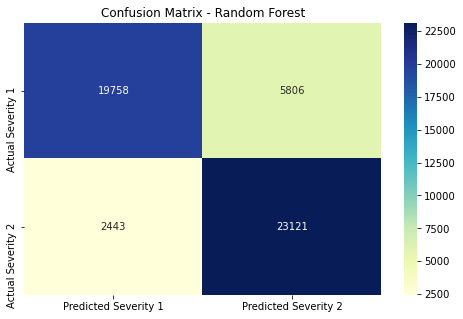

In [106]:
y_pred = rfc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

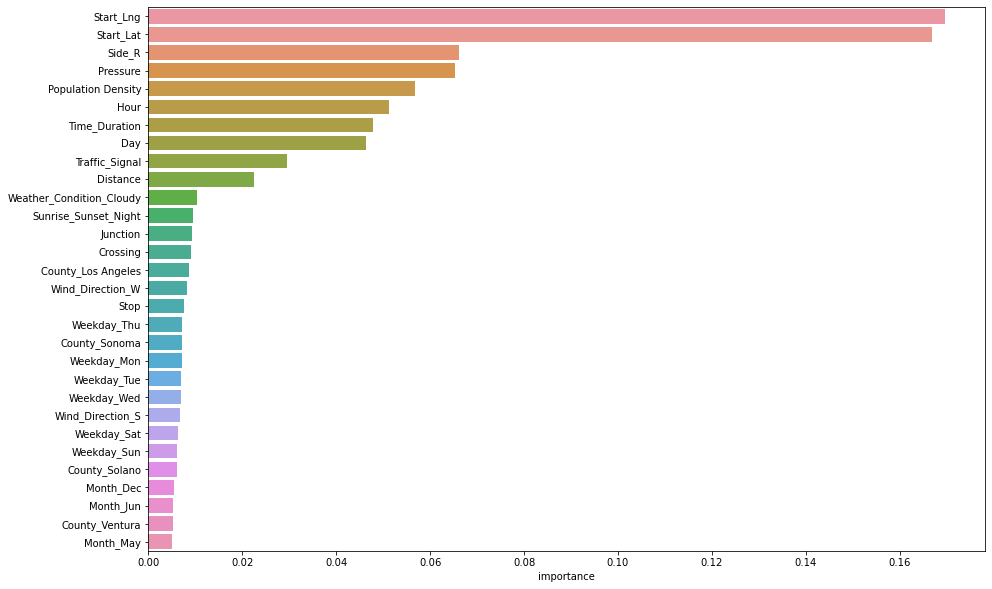

In [107]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

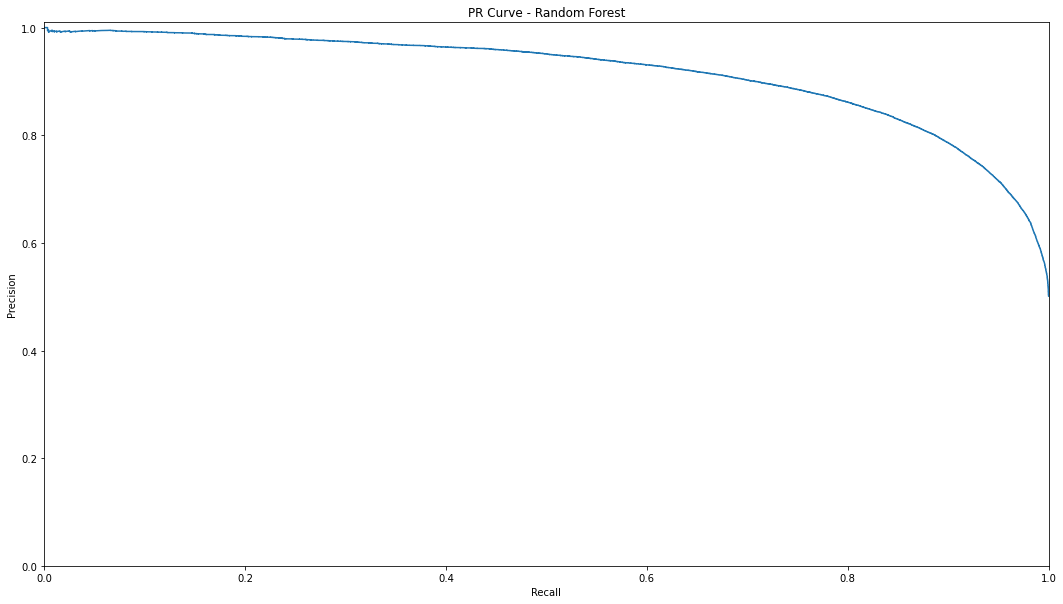

In [108]:
enc = OneHotEncoder()
Y = label_binarize(y_validate, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = rfc.predict_proba(X_validate)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

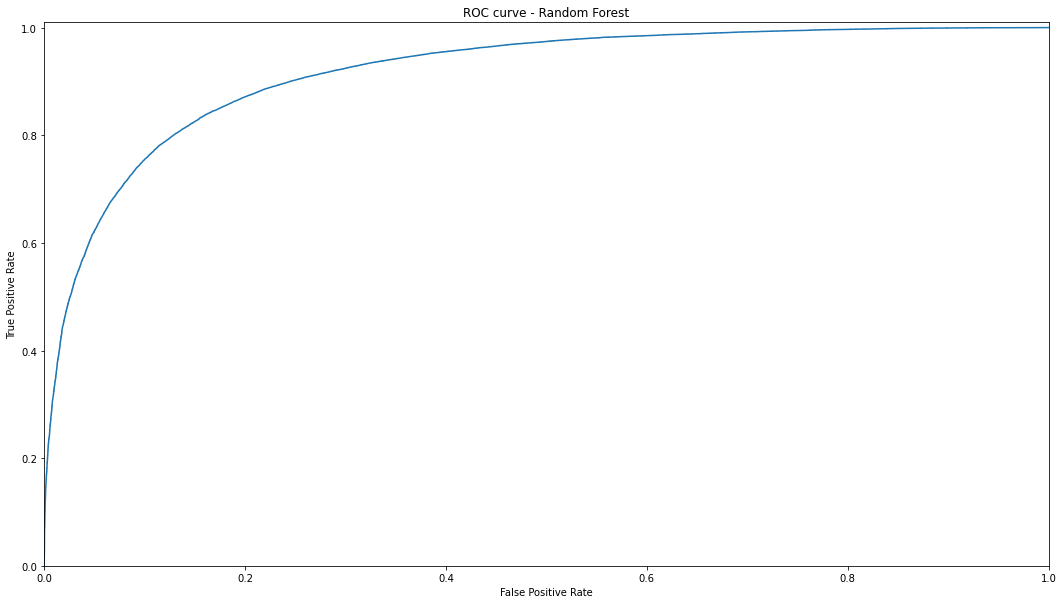

In [109]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [123]:
from sklearn.metrics import roc_auc_score

rfc = RandomForestClassifier(n_estimators=500, max_depth=30)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_validate)
print("AUC score:", roc_auc_score(y_validate, y_pred))

AUC score: 0.839051009231732


In [110]:
#不用看，留着
# max_features = rf_cv.cv_results_['param_max_features'].data
# R2_scores = rf_cv.cv_results_['mean_test_score']

# plt.figure(figsize=(8, 6))
# plt.xlabel('max features', fontsize=16)
# plt.ylabel('CV R2', fontsize=16)
# plt.scatter(max_features, R2_scores, s=30)
# plt.plot(max_features, R2_scores, linewidth=3)
# plt.grid(True, which='both')

In [111]:
#不用看，留着
# print(rf_cv.best_params_)

In [112]:
#不用看，留着
# def OSR2(model, X_test, y_test, y_train):
    
#     y_pred = model.predict(X_test)
#     SSE = np.sum((y_test - y_pred)**2)
#     SST = np.sum((y_test - np.mean(y_train))**2)
                 
#     return (1 - SSE/SST)
# print('Cross-validated R2:', round(rf_cv.best_score_, 5))
# print('OSR2:', round(OSR2(rf_cv, X_test, y_test, y_train), 5))

In [113]:
# clf_base = RandomForestClassifier()
# grid = {'n_estimators': [10, 50, 111],
#         'max_features': ['auto','sqrt']}
# clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

# clf_rf.fit(X_train, y_train)
# y_pred = clf_rf.predict(X_test)

# print (classification_report(y_test, y_pred))

## Naive Bayes

In [114]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Train score:", gnb.score(X_train, y_train))
print("Validation score:", gnb.score(X_validate, y_validate))

Train score: 0.602668991416309
Validation score: 0.6043850727585668


In [115]:
y_pred = gnb.predict(X_validate)

accuracy["Gaussian Naive Bayes"] = accuracy_score(y_validate, y_pred)
f1["Gaussian Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, gnb.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.22      0.35     59648
           1       0.56      0.99      0.71     59648

    accuracy                           0.60    119296
   macro avg       0.75      0.60      0.53    119296
weighted avg       0.75      0.60      0.53    119296

              precision    recall  f1-score   support

           0       0.95      0.22      0.36     25564
           1       0.56      0.99      0.71     25564

    accuracy                           0.60     51128
   macro avg       0.75      0.60      0.54     51128
weighted avg       0.75      0.60      0.54     51128



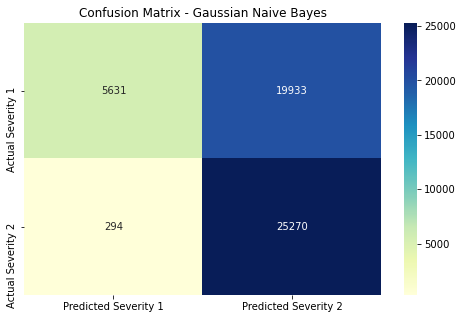

In [116]:
y_pred = gnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

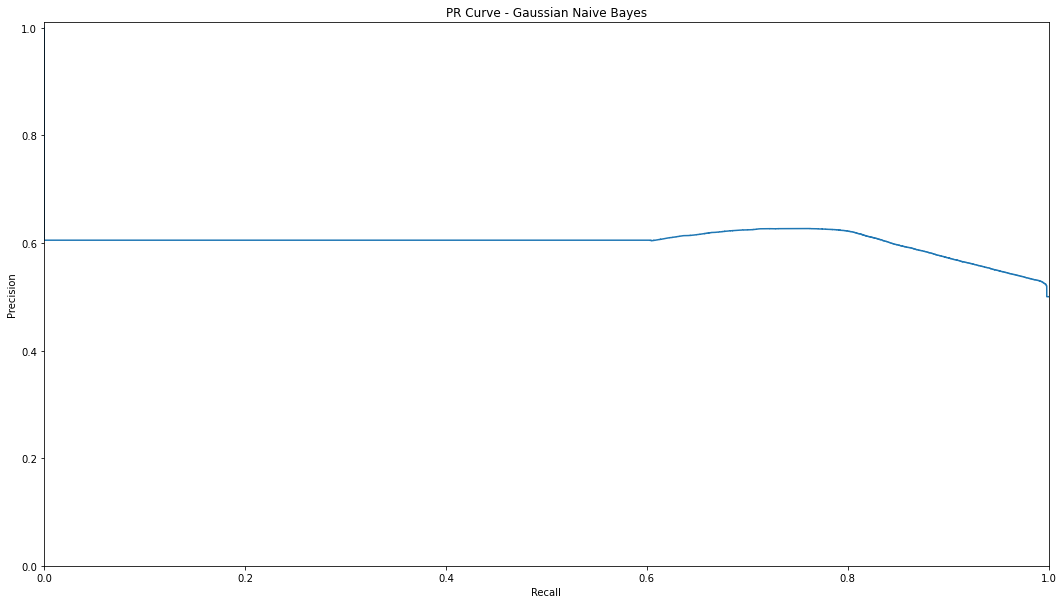

In [117]:
enc = OneHotEncoder()
Y = label_binarize(y_validate, classes=[0, 1])
Y = enc.fit_transform(Y).toarray()

y_score = gnb.predict_proba(X_validate)

precision["Gaussian Naive Bayes"], recall["Gaussian Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Gaussian Naive Bayes"], precision["Gaussian Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Gaussian Naive Bayes")
plt.show()

## Results

/home/lmh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


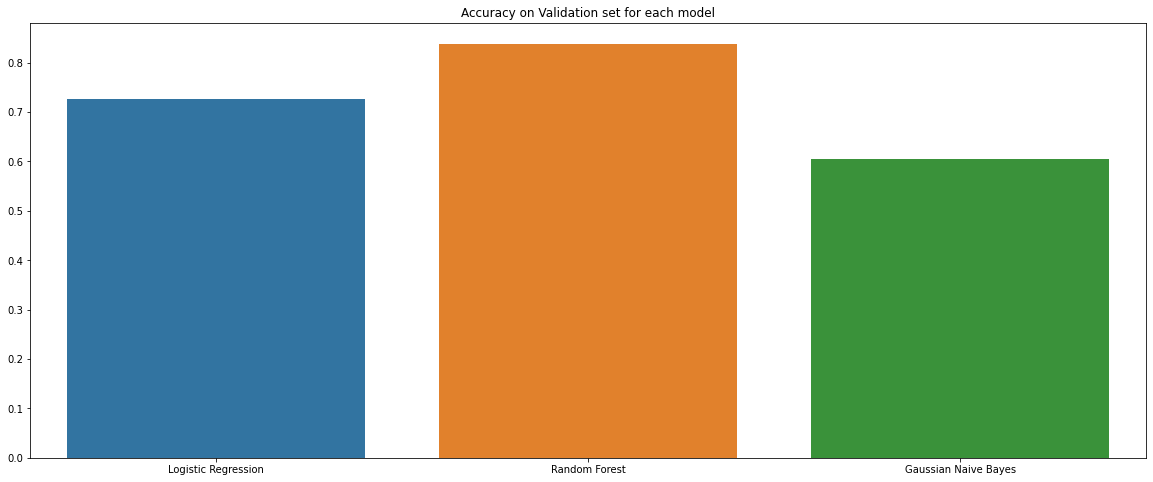

In [119]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

/home/lmh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


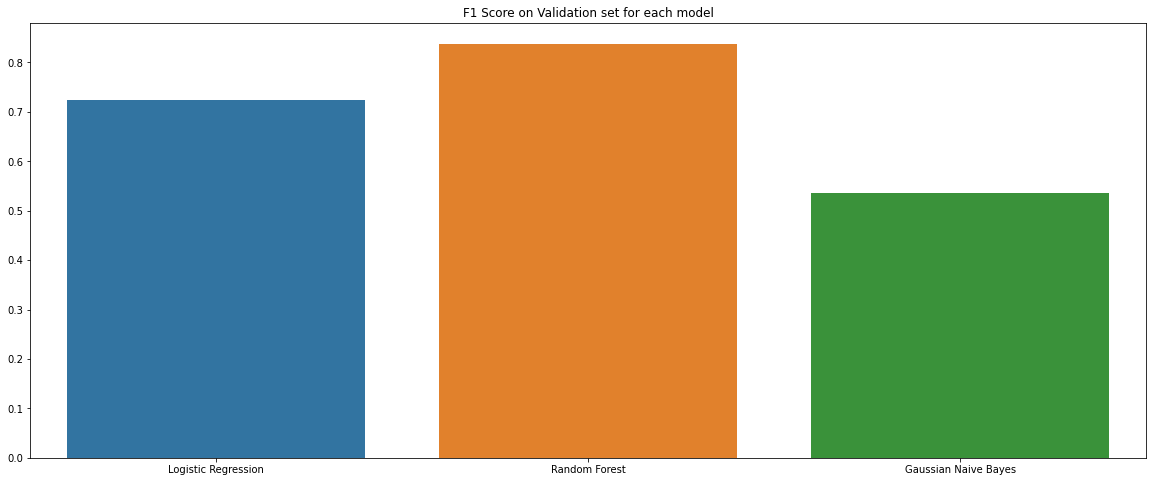

In [120]:
plt.figure(figsize=(20, 8))
plt.title("F1 Score on Validation set for each model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

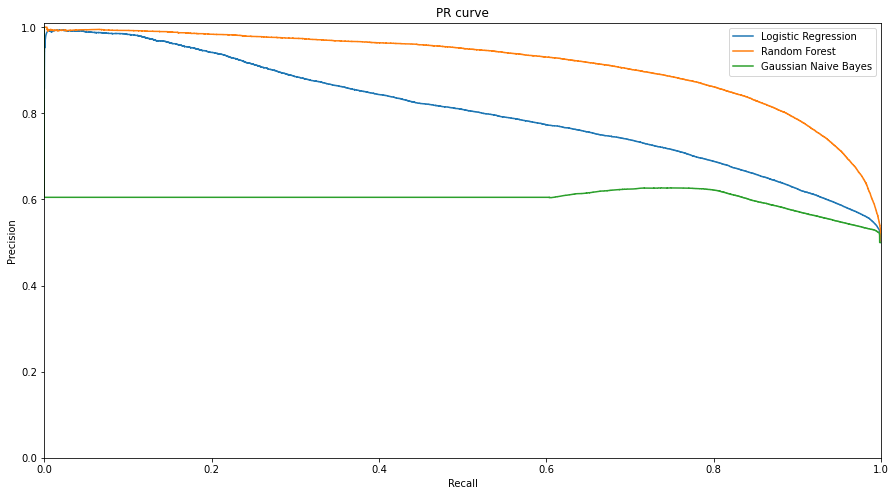

In [121]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.show()

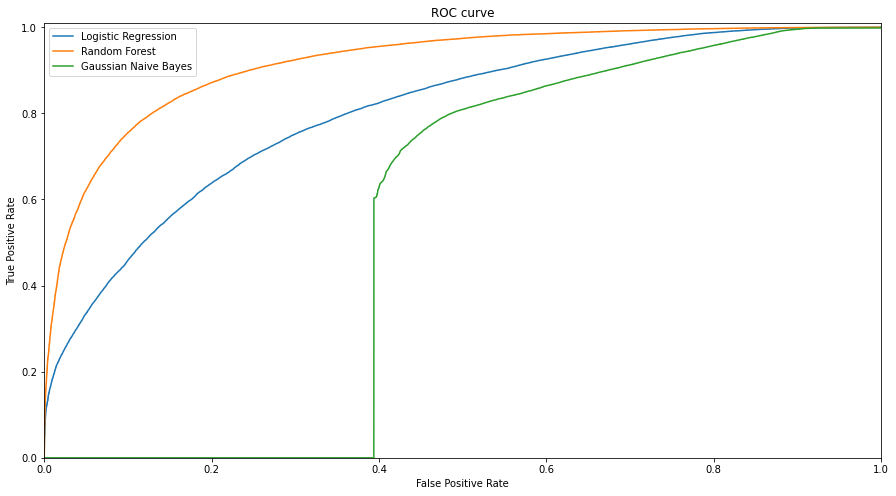

In [122]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.show()

In [129]:
# 导出结果，可以忽略

# import pickle

# results = []
# results.append(accuracy)
# results.append(precision)
# results.append(recall)
# results.append(f1)
# results.append(fpr)
# results.append(tpr)

# list_file = open('list1.pickle','wb')
# pickle.dump(results,list_file)
# list_file.close()